# Classic Mean Risk Optimization

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
# assets = [
#     'SPY',  # 미국 주식
#     'IEV',  # 유럽 주식 
#     'EWJ',  # 일본 주식
#     'EEM',  # 이머징 주식
#     'TLT',  # 미국 장기채
#     'IEF',  # 미국 중기채
#     'IYR',  # 미국 리츠
#     'RWX',  # 글로벌 리츠
#     'GLD',  # 금
#     'DBC'  # 상품
# ]
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
display(data.head())
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


Price       Adj Close                                                          \
Ticker            APA          BA        BAX        BMY      CMCSA        CNP   
Date                                                                            
2016-01-04 3688.4823% 12600.5112% 3262.6793% 5113.5548% 2305.9944% 1363.5843%   
2016-01-05 3613.7661% 12651.6289% 3275.8457% 5214.2544% 2306.4095% 1376.2720%   
2016-01-06 3198.6782% 12450.7393% 3283.7460% 5122.7093% 2288.5881% 1359.1062%   
2016-01-07 3034.3018% 11928.7811% 3229.3251% 4980.8147% 2263.3062% 1332.2374%   
2016-01-08 3042.6037% 11657.9399% 3177.5366% 4854.1775% 2265.7930% 1329.2525%   

Price                                                  ...   Volume           \
Ticker            CPB         DE       HPQ        JCI  ...       NI     PCAR   
Date                                                   ...                     
2016-01-04 3960.2810% 6577.7794% 884.7258% 2396.6349%  ...  2592700  4318500   
2016-01-05 3974.8463% 6615.8203% 893.1152% 2367.9873%  ...  3138800  3235200   
2016-01-06 3967.9459% 6541.4688% 861.0820% 2345.3699%  ...  3525700  4285350   
2016-01-07 3919.5126% 6483.5403% 821.4220% 2285.8126%  ...  3047600  4433850   
2016-01-08 3941.8785% 6377.1965% 806.9309% 2282.0425%  ...  2933800  4197600   

Price                                                                         \
Ticker          PSA      SEE         T       TGT      TMO      TXT        VZ   
Date                                                                           
2016-01-04  1220900  1697500  42076058   8233300  3287500  1658200  17821600   
2016-01-05   776000  1307300  40656465   8191400  3184400  1514400  15632800   
2016-01-06   589800  1116500  35631223   4921400  2300800  2258000  19082700   
2016-01-07   633700  1541500  46487494  11289900  2470900  2192900  19277600   
2016-01-08   600600  2144600  37192219   7749000  2148100  3436000  16594800   

Price                
Ticker         ZION  
Date                 
2016-01-04  3523300  
2016-01-05  2653600  
2016-01-06  4164200  
2016-01-07  4234000  
2016-01-08  3401600  

[5 rows x 150 columns]

In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0256%,0.4057%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2409%,1.3735%,-1.0857%
2016-01-06,-11.4864%,-1.5879%,0.2412%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9034%,-2.9145%
2016-01-07,-5.1389%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2206%,-0.8855%,-4.6059%,-2.5394%,...,-2.2067%,-3.0310%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0020%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5706%,-1.6402%,-1.7642%,-0.1649%,...,-0.1538%,-1.1366%,-0.7308%,-0.1448%,0.0896%,-3.3839%,-0.1117%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3384%,0.1692%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5287%,0.6616%,0.0330%,...,1.6435%,0.0000%,0.9870%,-0.1451%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5800%,-1.9919%


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.
포트폴리오의 기대 수익률과 공분산 행렬을 역사적 데이터를 기반으로 추정한 후, 샤프 비율을 최대화하는 최적의 자산 배분을 계산

In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # 과거 데이터를 기반으로 기대 수익률을 추정하는 방법을 선택
method_cov='hist' # 과거 데이터를 기반으로 공분산 행렬을 추정하는 방법을 선택

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model='Classic' # 고전적인 방법(과거 데이터 기반)을 사용하여 최적화 모델을 설정합니다. 다른 옵션으로는 Black-Litterman 모델(BL)과 요인 모델(FM)이 있습니다.
rm = 'MV' # 리스크 측정 방법으로 분산(Variance)을 사용
obj = 'Sharpe' # 샤프 비율을 최대화하는 것을 목표로 최적화를 수행합니다. 다른 목표 함수로는 최소 리스크(MinRisk), 최대 수익(MaxRet), 효용(Utility)이 있습니다.
hist = True # 역사적 시나리오를 사용하여 리스크 측정 값을 계산
rf = 0 # 무위험 이자율을 0으로 설정
l = 0 # 위험 회피 계수를 0으로 설정합니다. 이는 obj가 'Utility'일 때만 유용합니다.

# 지정된 모델과 목표 함수에 따라 최적의 자산 배분 가중치 w를 계산합니다.
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.1590%,11.5018%,0.0000%,0.0000%,8.4807%,0.0000%,3.8194%,0.0000%,0.0000%,...,10.8263%,0.0000%,0.0000%,0.0000%,0.0000%,7.1805%,0.0000%,0.0000%,4.2740%,0.0000%


### 2.2 Plotting portfolio composition

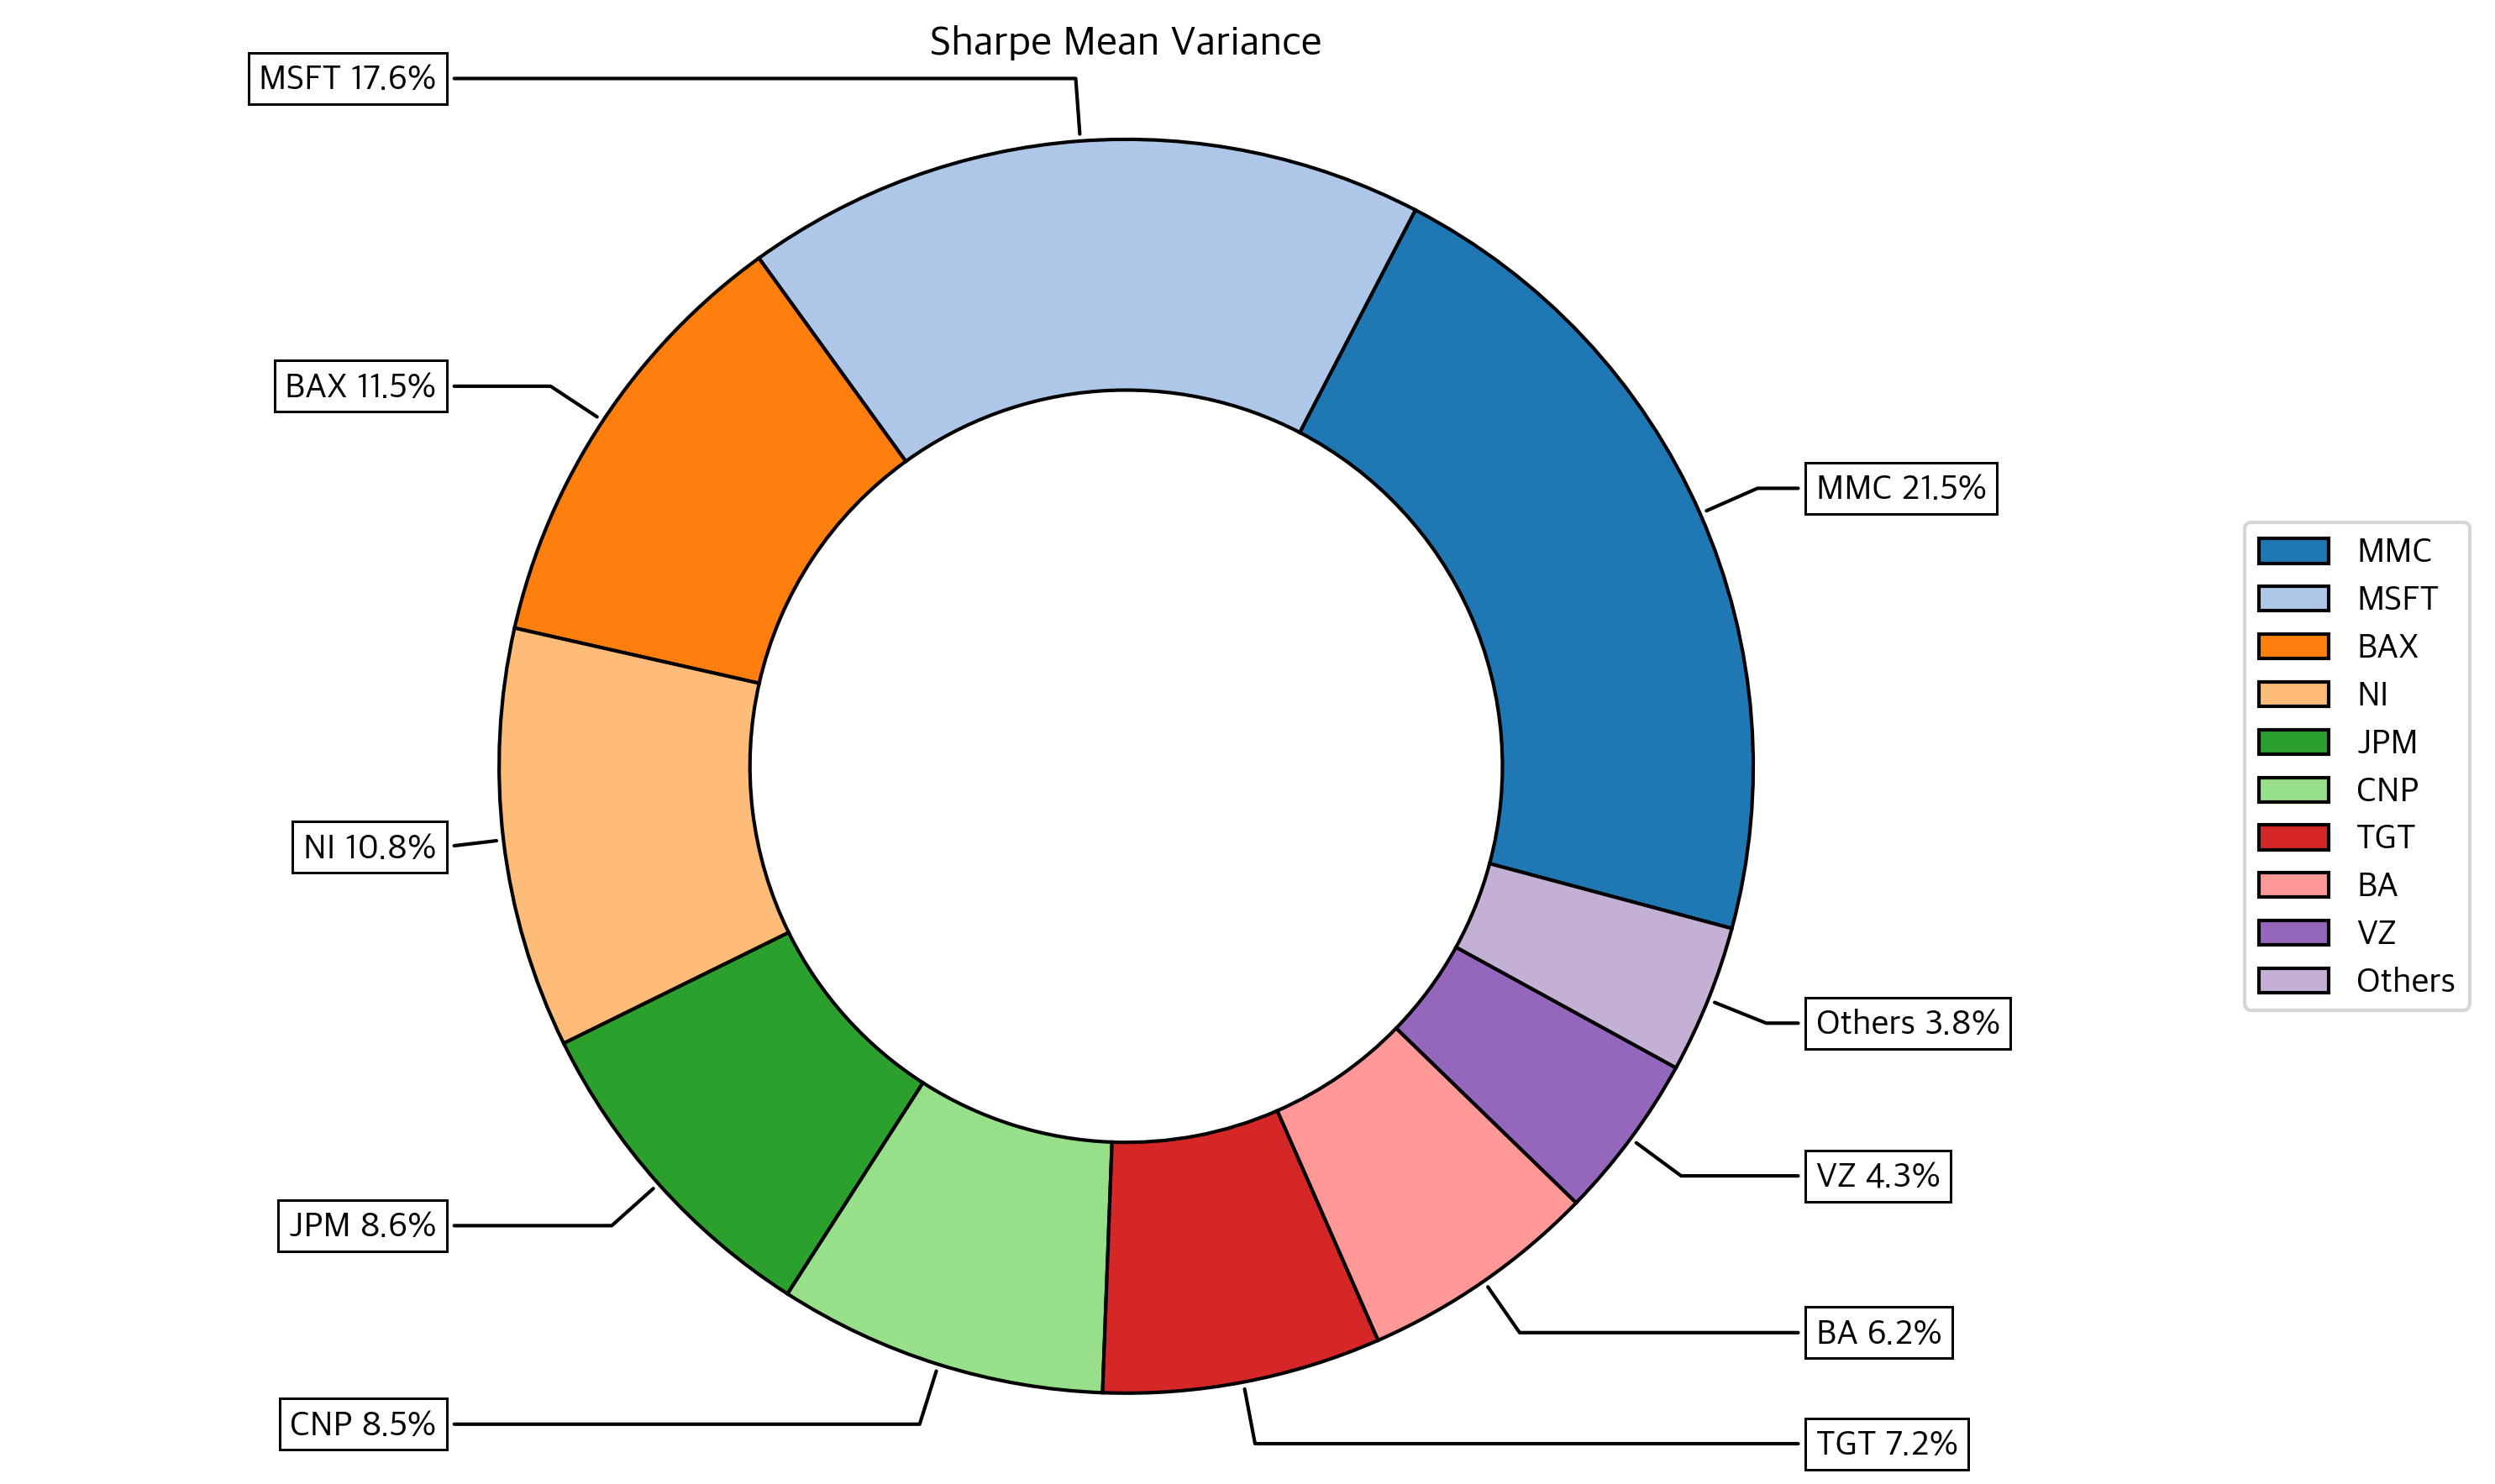

In [22]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [4]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,5.2376%,4.3880%,2.1296%,6.9906%,3.2270%,0.0742%,0.0000%,2.8447%,...,11.4529%,0.0000%,14.9247%,0.1681%,6.5902%,4.0900%,0.0000%,0.0000%,8.2768%,0.0000%
1,0.0000%,2.0125%,8.4902%,0.7981%,1.6844%,8.5600%,2.1529%,1.3613%,0.0000%,1.0445%,...,13.4496%,0.0000%,9.2099%,0.0000%,5.5814%,5.5235%,0.0000%,0.0000%,8.7591%,0.0000%
2,0.0000%,2.8165%,9.3711%,0.0000%,1.1980%,9.1477%,1.7065%,1.7396%,0.0000%,0.0872%,...,14.2328%,0.0000%,6.4847%,0.0000%,5.1002%,6.0539%,0.0000%,0.0000%,9.0040%,0.0000%
3,0.0000%,3.4305%,9.9328%,0.0000%,0.5693%,9.5579%,1.0811%,1.9317%,0.0000%,0.0000%,...,14.7707%,0.0000%,3.6630%,0.0000%,4.2577%,6.4249%,0.0000%,0.0000%,9.2133%,0.0000%
4,0.0000%,3.9343%,10.3864%,0.0000%,0.0003%,9.8876%,0.3998%,2.0811%,0.0000%,0.0000%,...,15.1319%,0.0000%,1.0859%,0.0000%,3.3463%,6.7109%,0.0000%,0.0000%,9.2765%,0.0000%
5,0.0000%,4.4793%,10.7245%,0.0000%,0.0000%,9.8367%,0.0000%,2.4430%,0.0000%,0.0000%,...,14.6401%,0.0000%,0.0000%,0.0000%,1.8295%,6.9030%,0.0000%,0.0000%,8.9020%,0.0000%
6,0.0000%,5.0238%,10.9590%,0.0000%,0.0000%,9.5083%,0.0000%,2.9418%,0.0000%,0.0000%,...,13.5451%,0.0000%,0.0000%,0.0000%,0.0721%,7.0214%,0.0000%,0.0000%,8.2413%,0.0000%
7,0.0000%,5.4939%,11.1831%,0.0000%,0.0000%,9.0866%,0.0000%,3.3059%,0.0000%,0.0000%,...,12.4246%,0.0000%,0.0000%,0.0000%,0.0000%,7.0881%,0.0000%,0.0000%,6.6307%,0.0000%
8,0.0000%,5.9106%,11.3829%,0.0000%,0.0000%,8.7063%,0.0000%,3.6280%,0.0000%,0.0000%,...,11.4234%,0.0000%,0.0000%,0.0000%,0.0000%,7.1460%,0.0000%,0.0000%,5.1532%,0.0000%
9,0.0000%,6.2916%,11.5652%,0.0000%,0.0000%,8.3596%,0.0000%,3.9211%,0.0000%,0.0000%,...,10.5079%,0.0000%,0.0000%,0.0000%,0.0000%,7.1987%,0.0000%,0.0000%,3.8054%,0.0000%


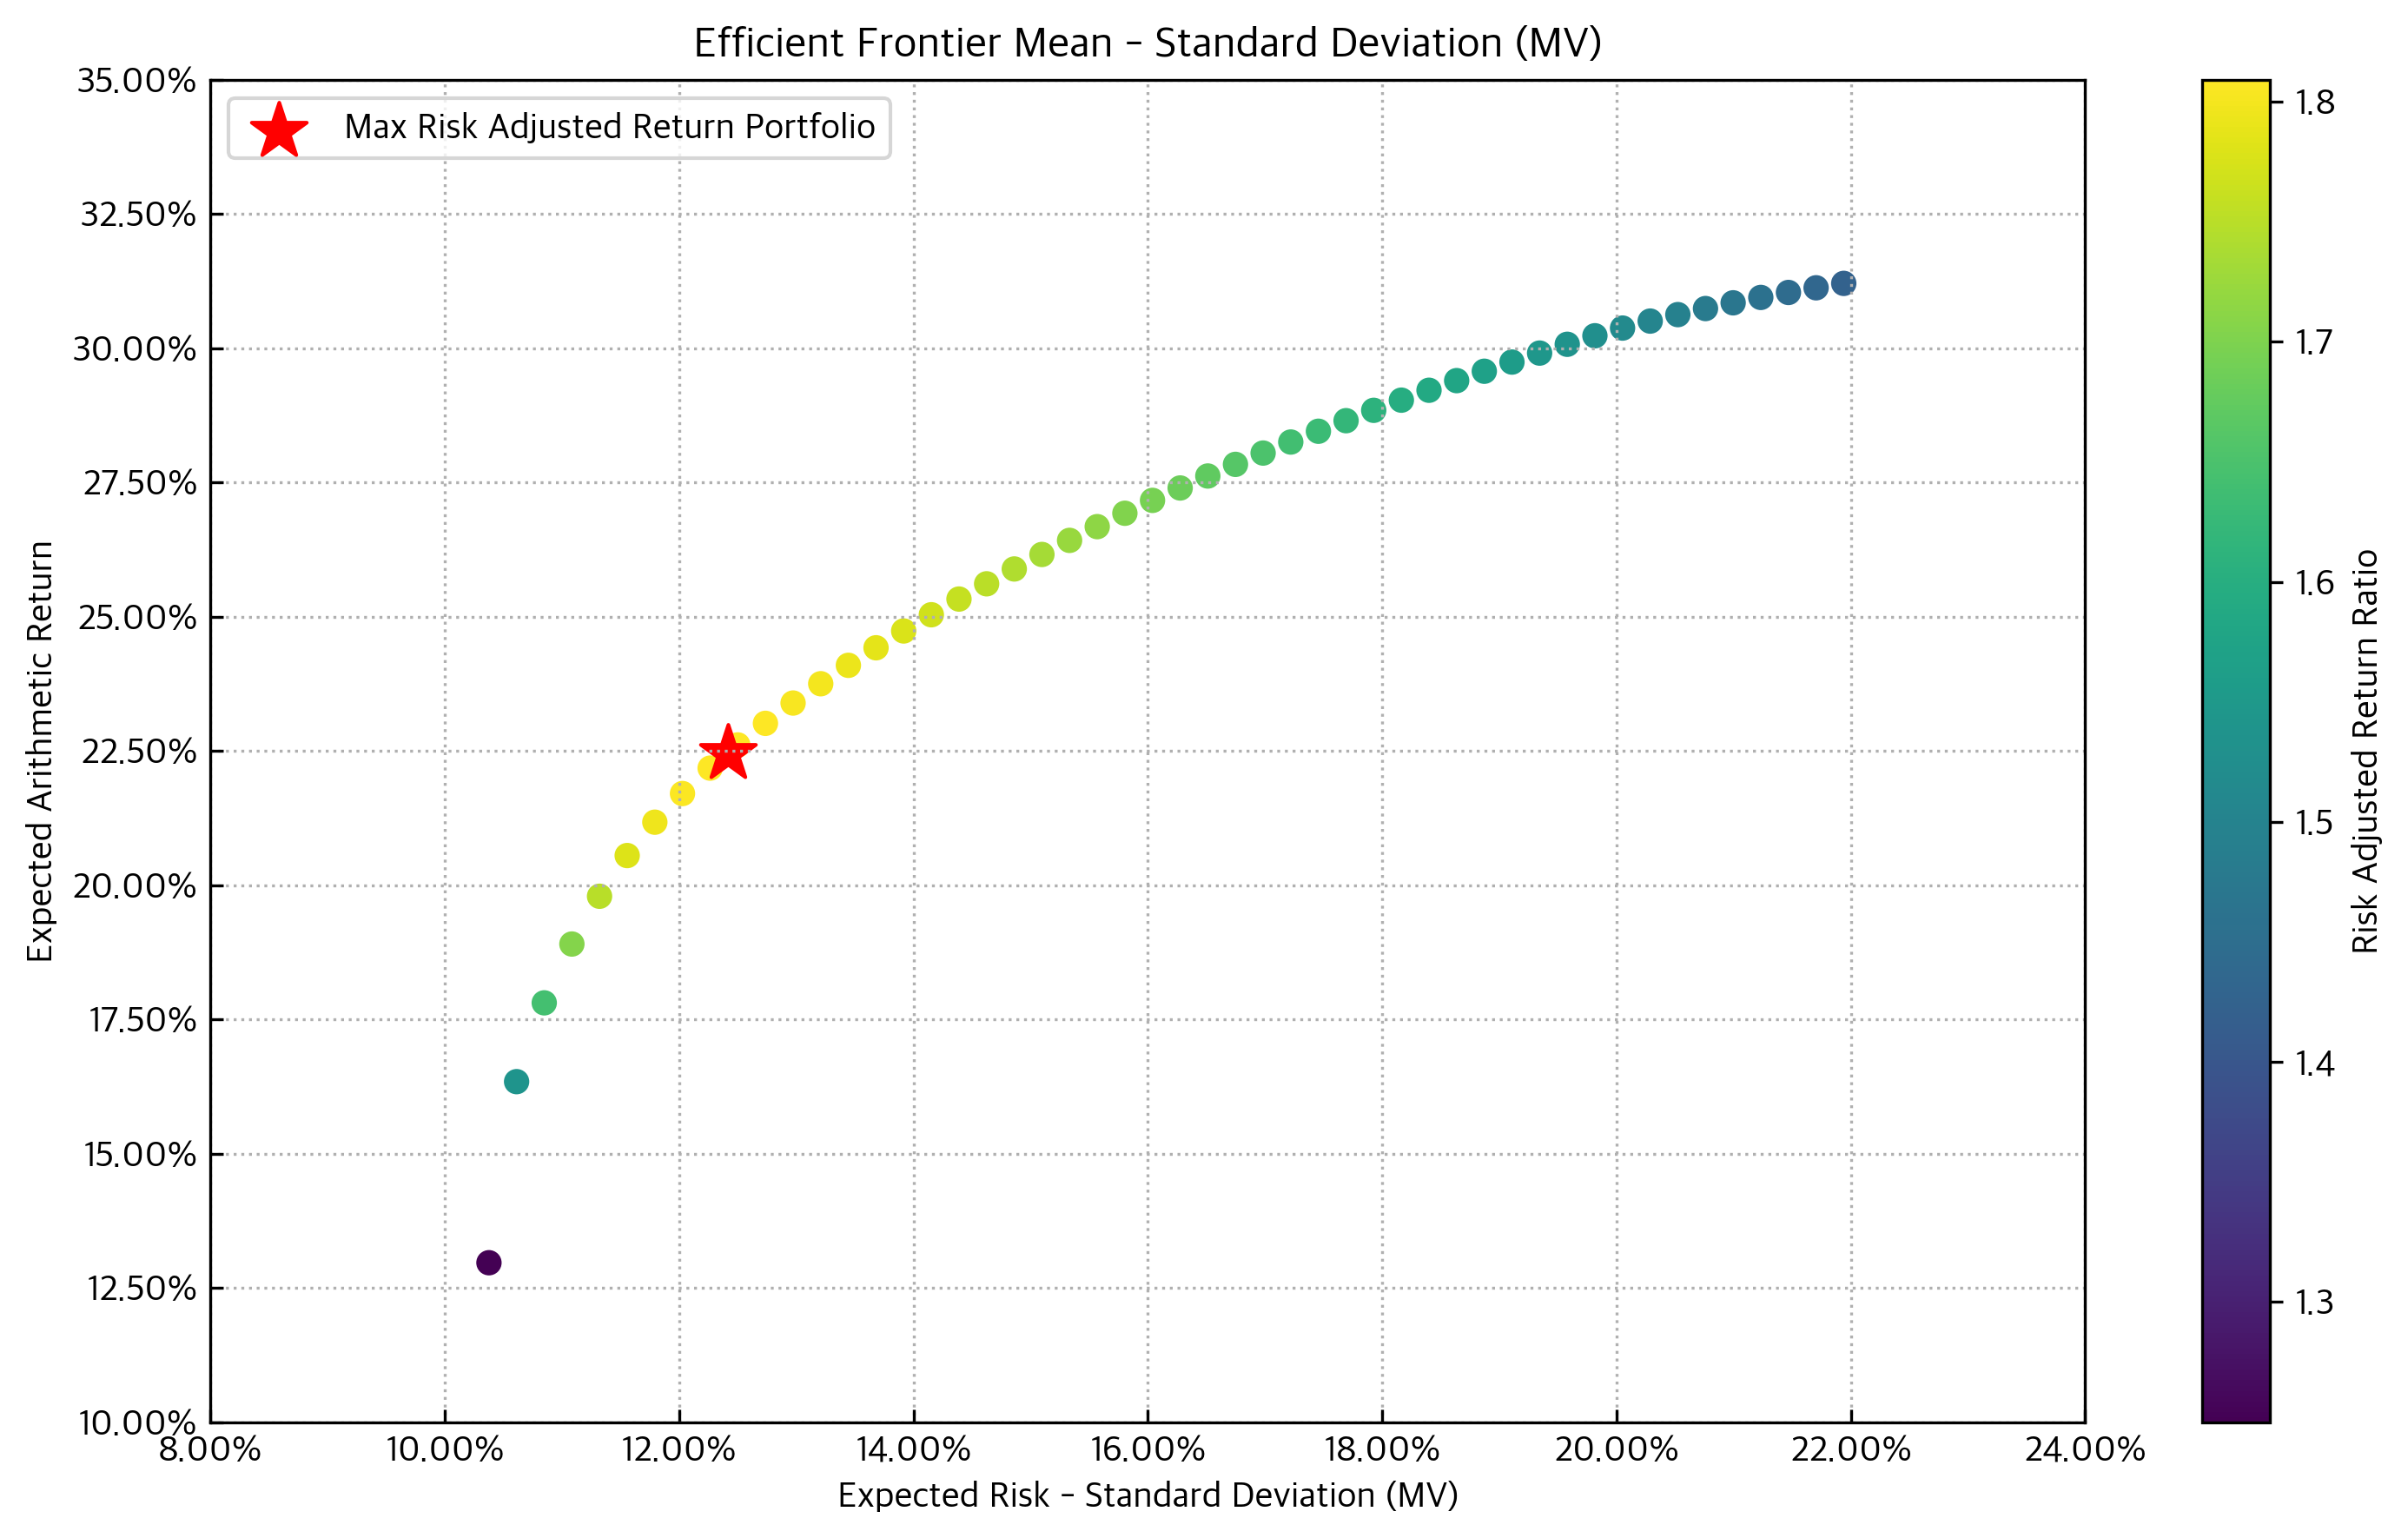

In [5]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

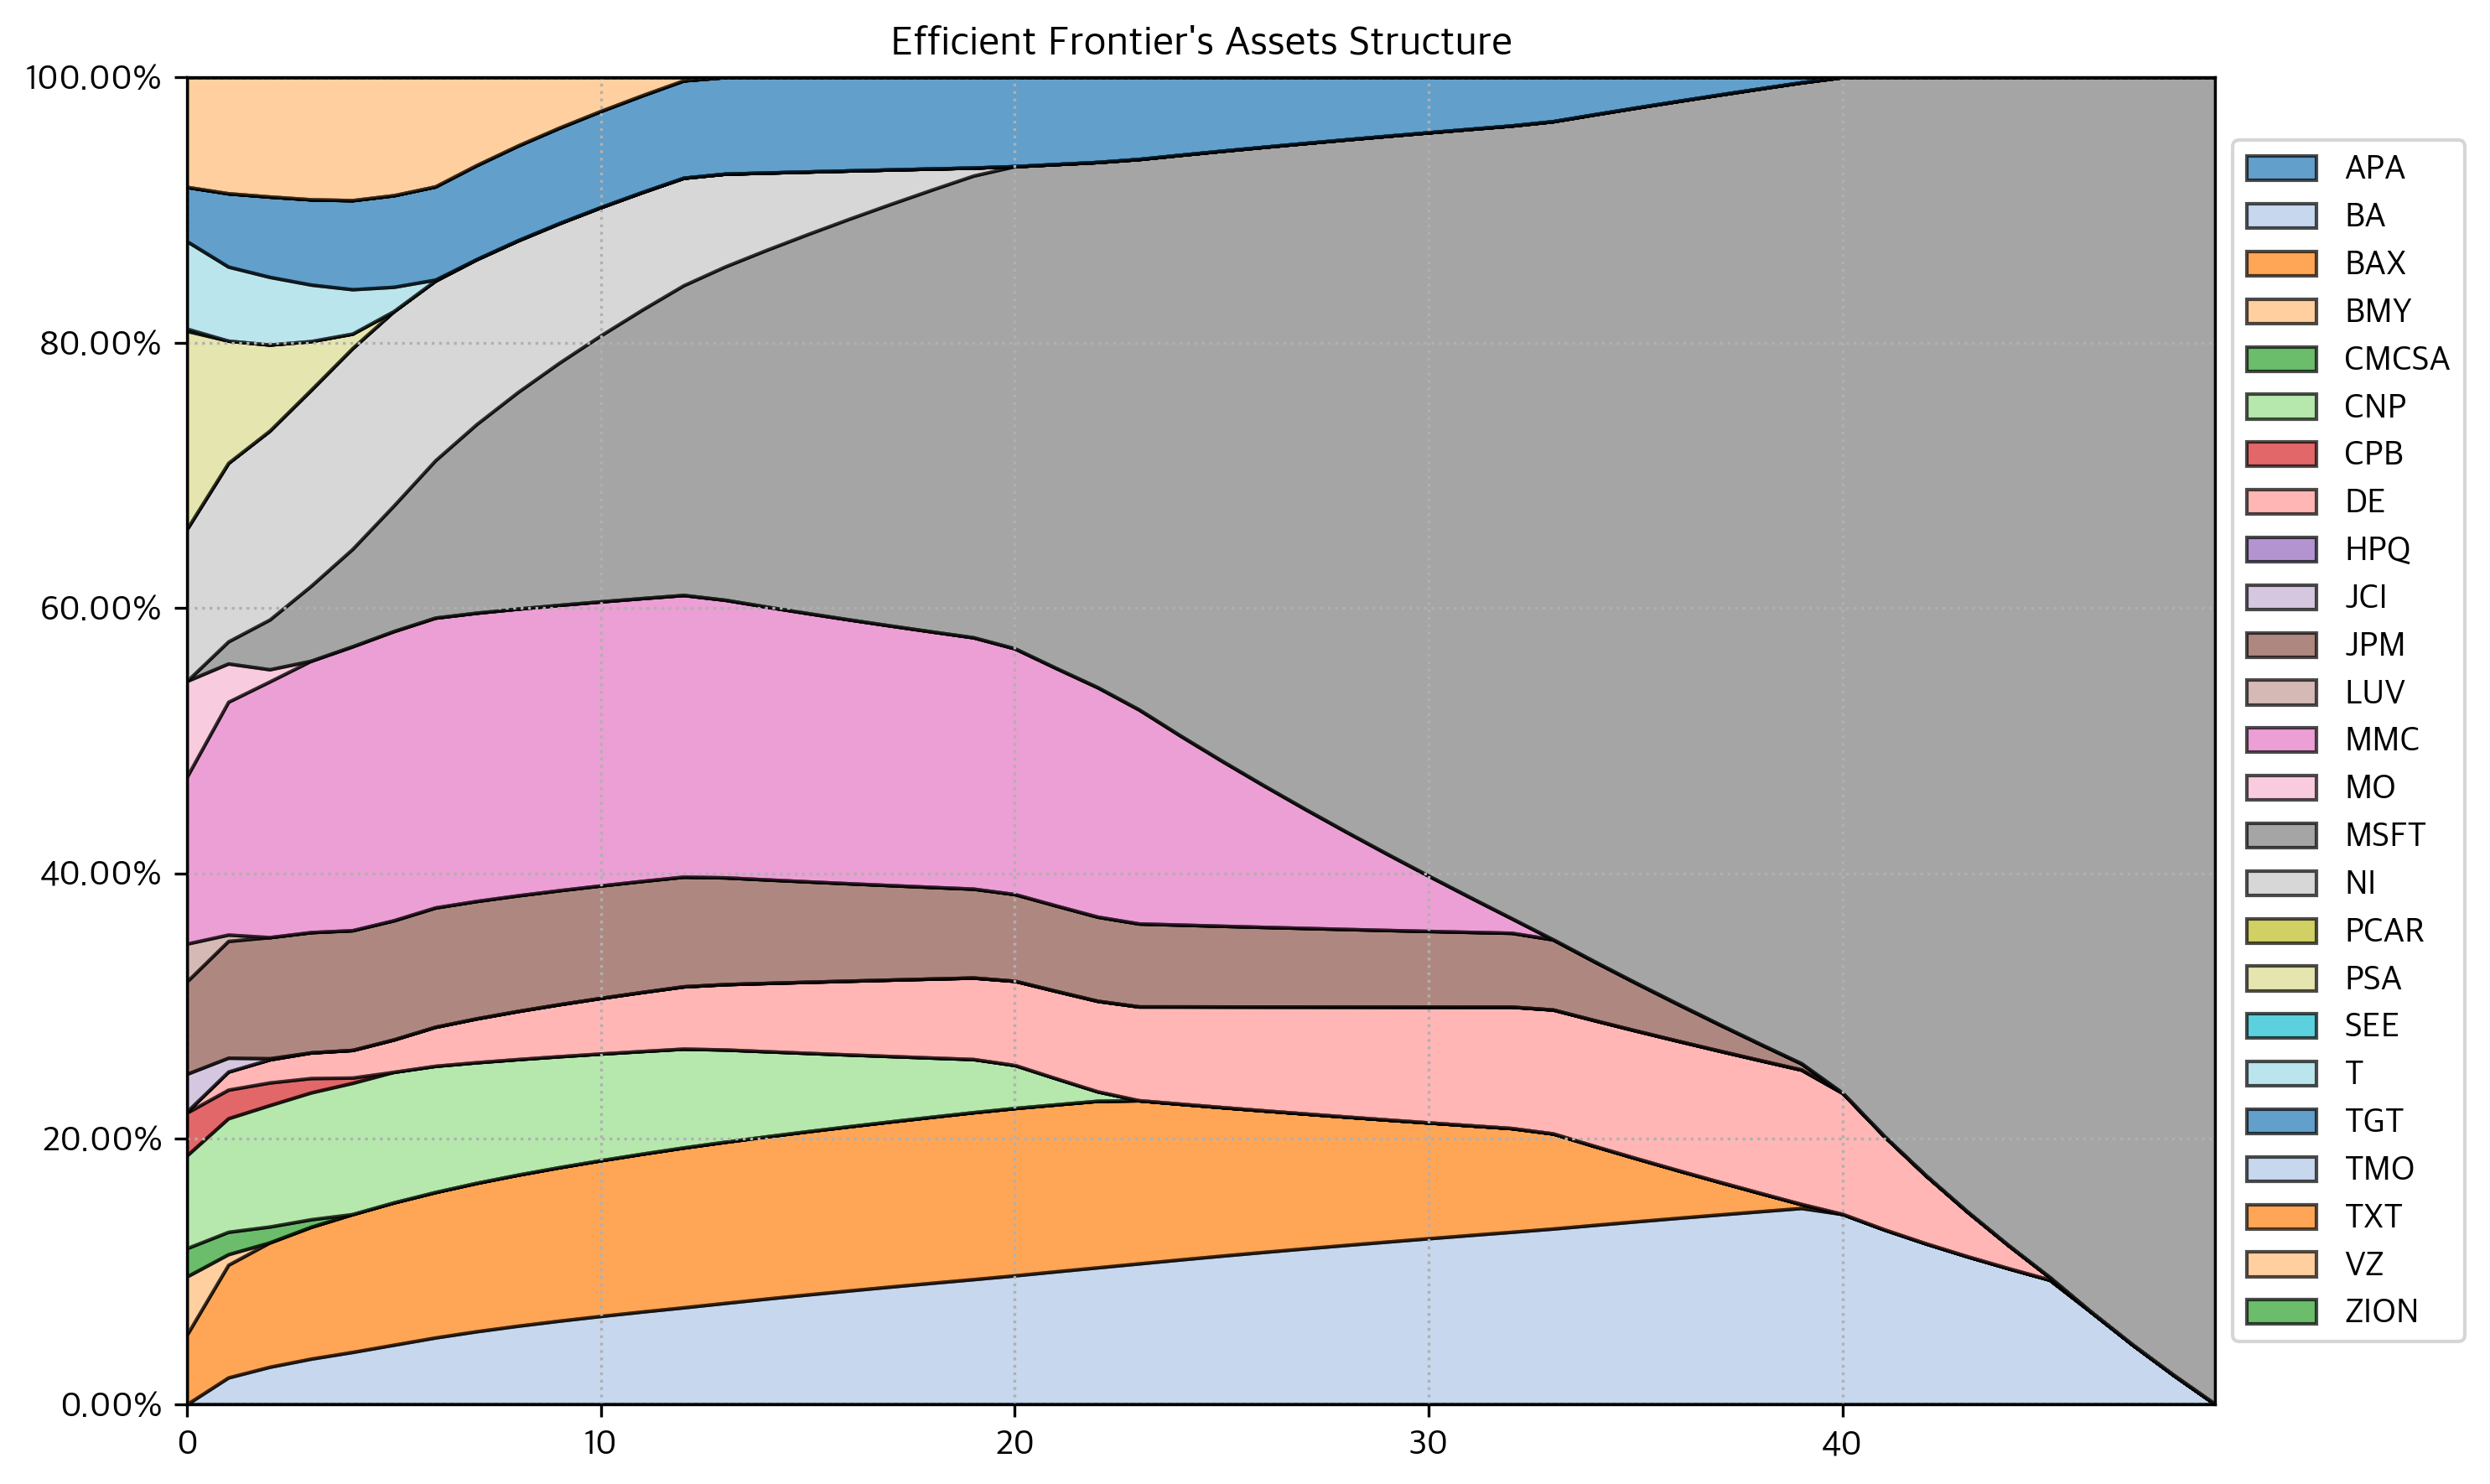

In [6]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Mean Risk Portfolios

### 3.1 Calculating the portfolio that maximizes Return/CVaR ratio.


In [7]:
rm = 'CVaR' # Risk measure 조건부 가치-at-리스크(CVaR, Conditional Value at Risk)

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,12.3495%,0.0000%,0.0000%,7.4901%,0.0000%,5.1439%,0.0000%,0.0000%,...,12.6867%,0.0000%,0.0000%,0.0000%,0.0000%,11.1967%,0.0000%,0.0000%,3.6757%,0.0000%


### 3.2 Plotting portfolio composition

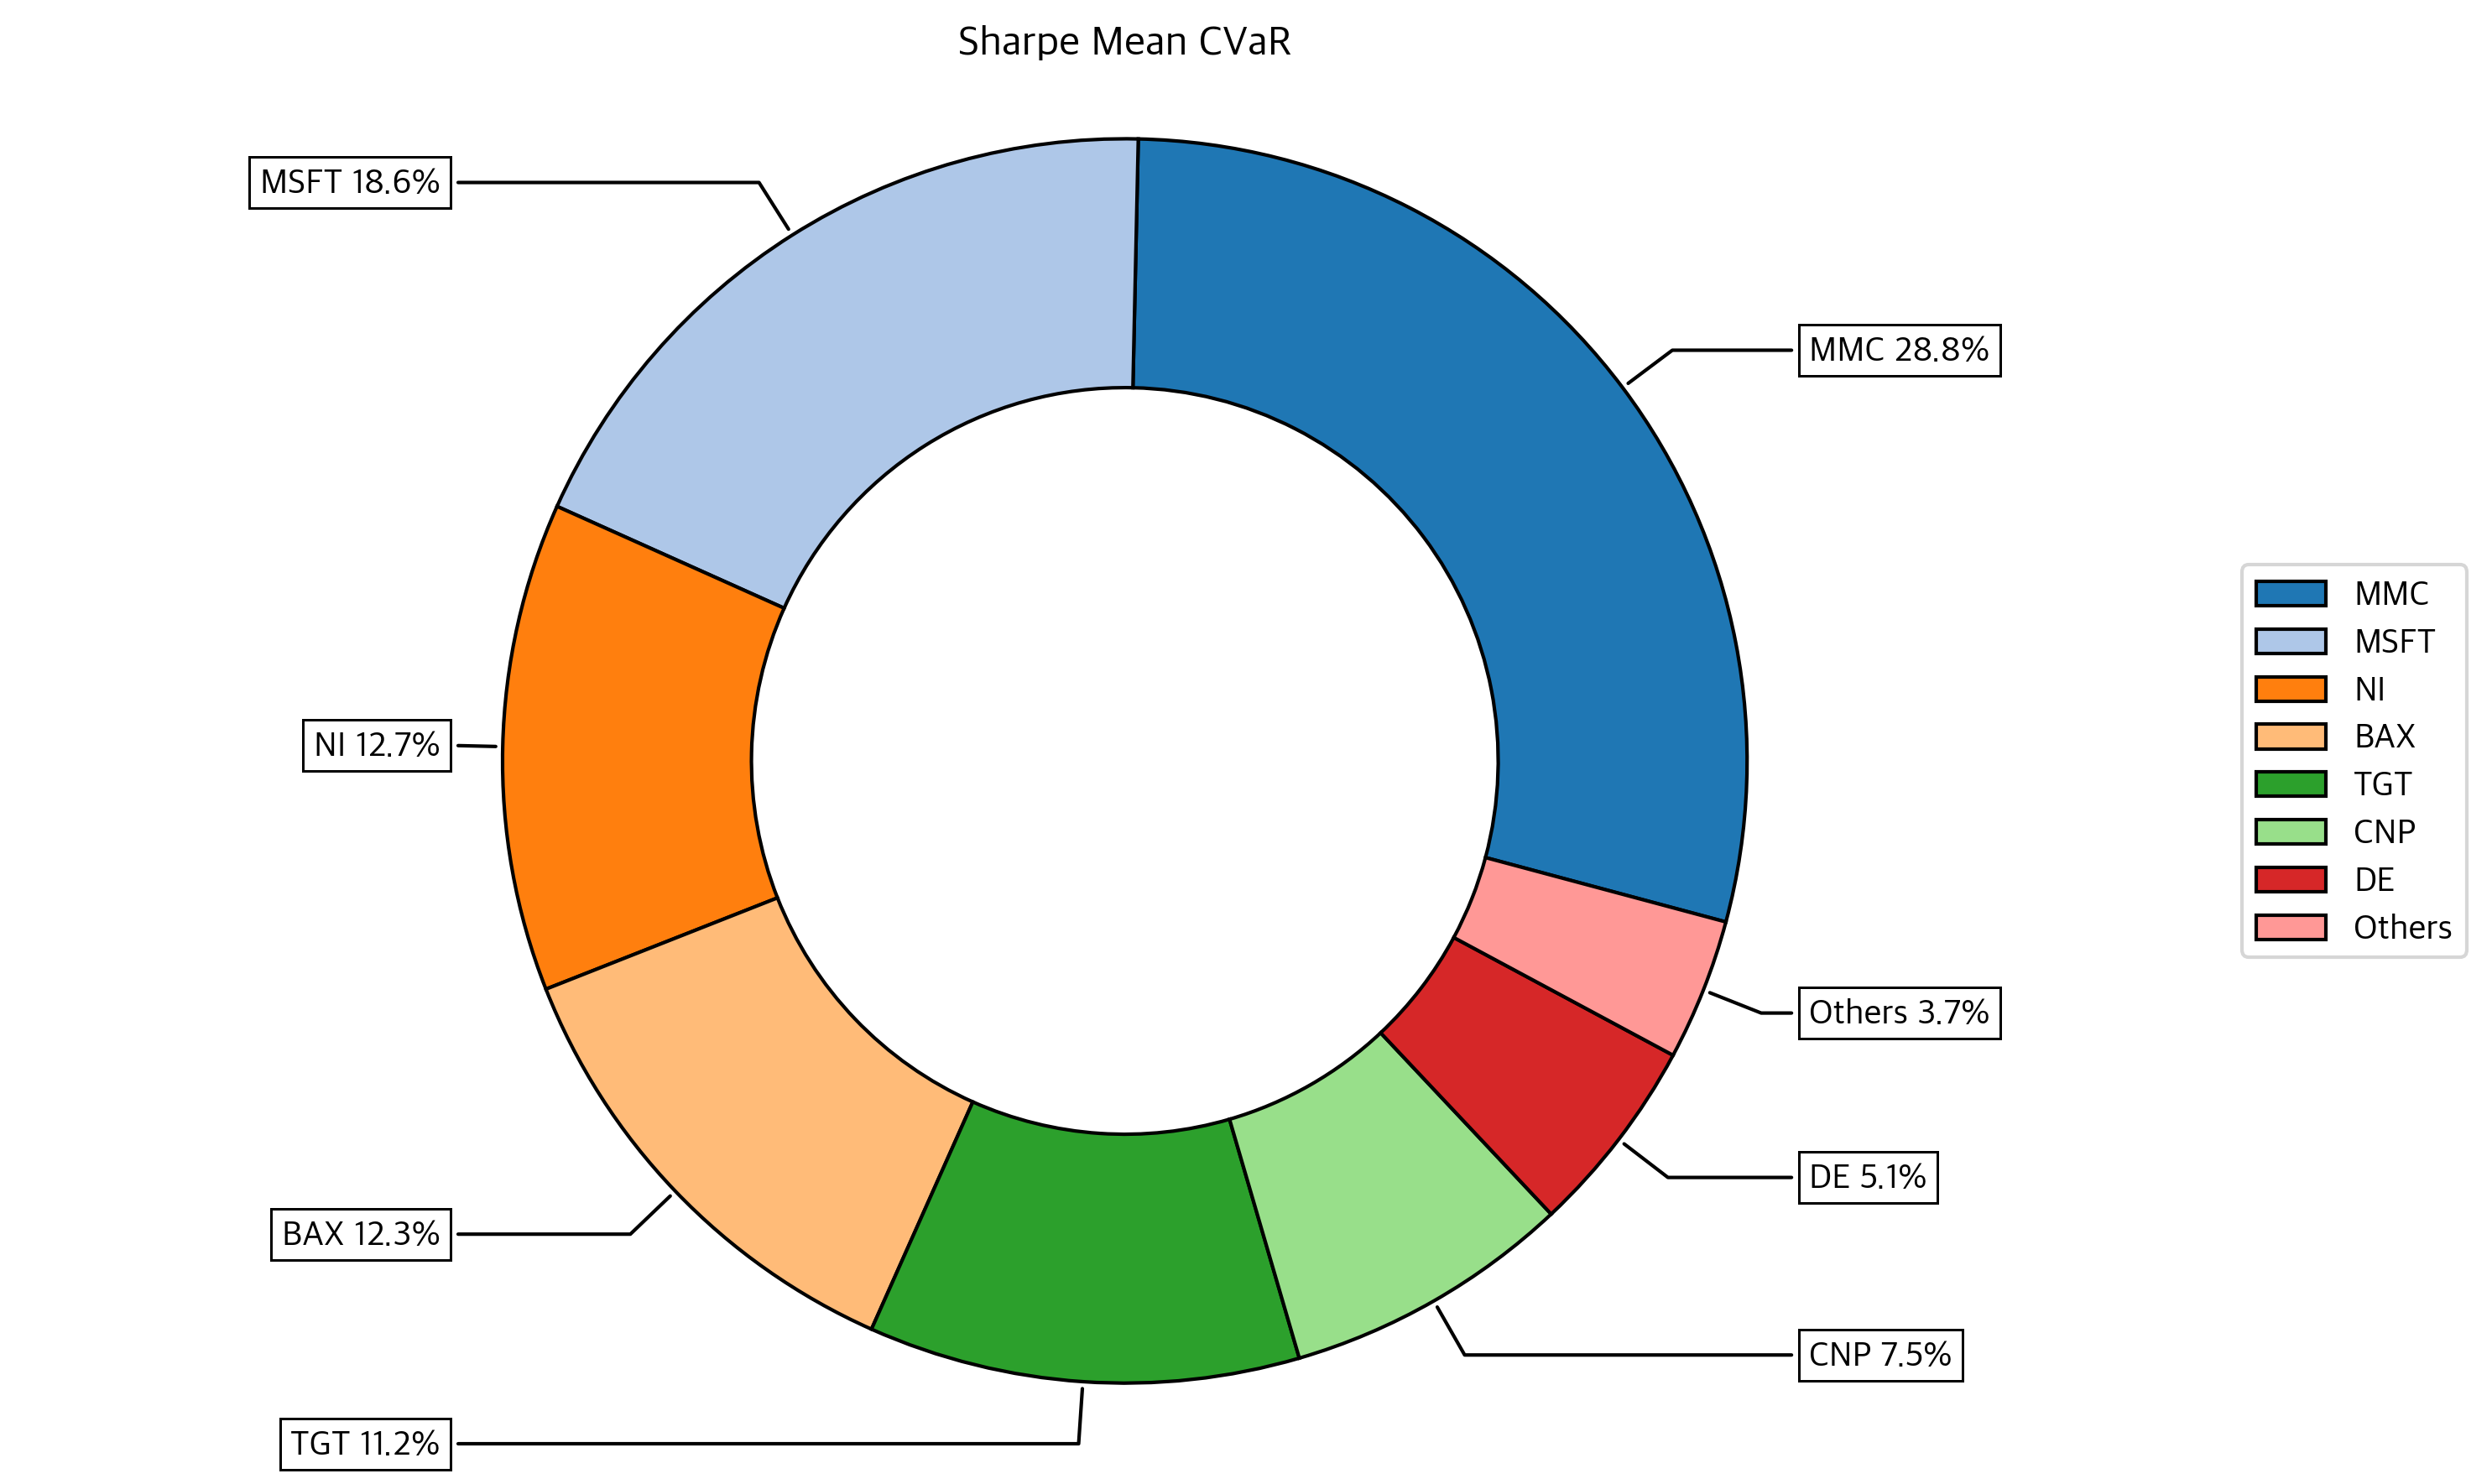

In [8]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3 Calculate efficient frontier
효율적 프론티어는 특정 리스크 수준에서 최대 기대 수익을 제공하는 포트폴리오들의 조합을 나타내는 곡선

In [9]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,2.1563%,7.0923%,0.1946%,1.8679%,7.9950%,0.0000%,0.0000%,4.0583%,...,6.9443%,0.0000%,20.6085%,0.0000%,3.0316%,4.1820%,0.0000%,0.0000%,20.4704%,0.0000%
1,0.0000%,0.0000%,4.5452%,5.5634%,0.0000%,5.8121%,4.6606%,0.0000%,0.0000%,1.8858%,...,7.6677%,0.0000%,14.5023%,0.0000%,2.4022%,7.1314%,0.0000%,0.0000%,19.6506%,0.0000%
2,0.0000%,0.0000%,6.0531%,3.3839%,0.0000%,12.2802%,0.0000%,0.0000%,0.0000%,2.1419%,...,6.8991%,0.0000%,12.1775%,0.0000%,0.5919%,6.5752%,0.0000%,0.0000%,19.4965%,0.0000%
3,0.0000%,0.0000%,6.8328%,0.1520%,0.0000%,12.8566%,0.0000%,0.6414%,0.0000%,0.4062%,...,7.4377%,0.0000%,10.4819%,0.0000%,0.0000%,8.2858%,0.0000%,0.0000%,17.5789%,0.0000%
4,0.0000%,0.0000%,7.7459%,0.0000%,0.0000%,13.4306%,0.0000%,0.0000%,0.0000%,0.7557%,...,8.4909%,0.0000%,5.3138%,0.0000%,0.0000%,10.5389%,0.0000%,0.0000%,14.2242%,0.0000%


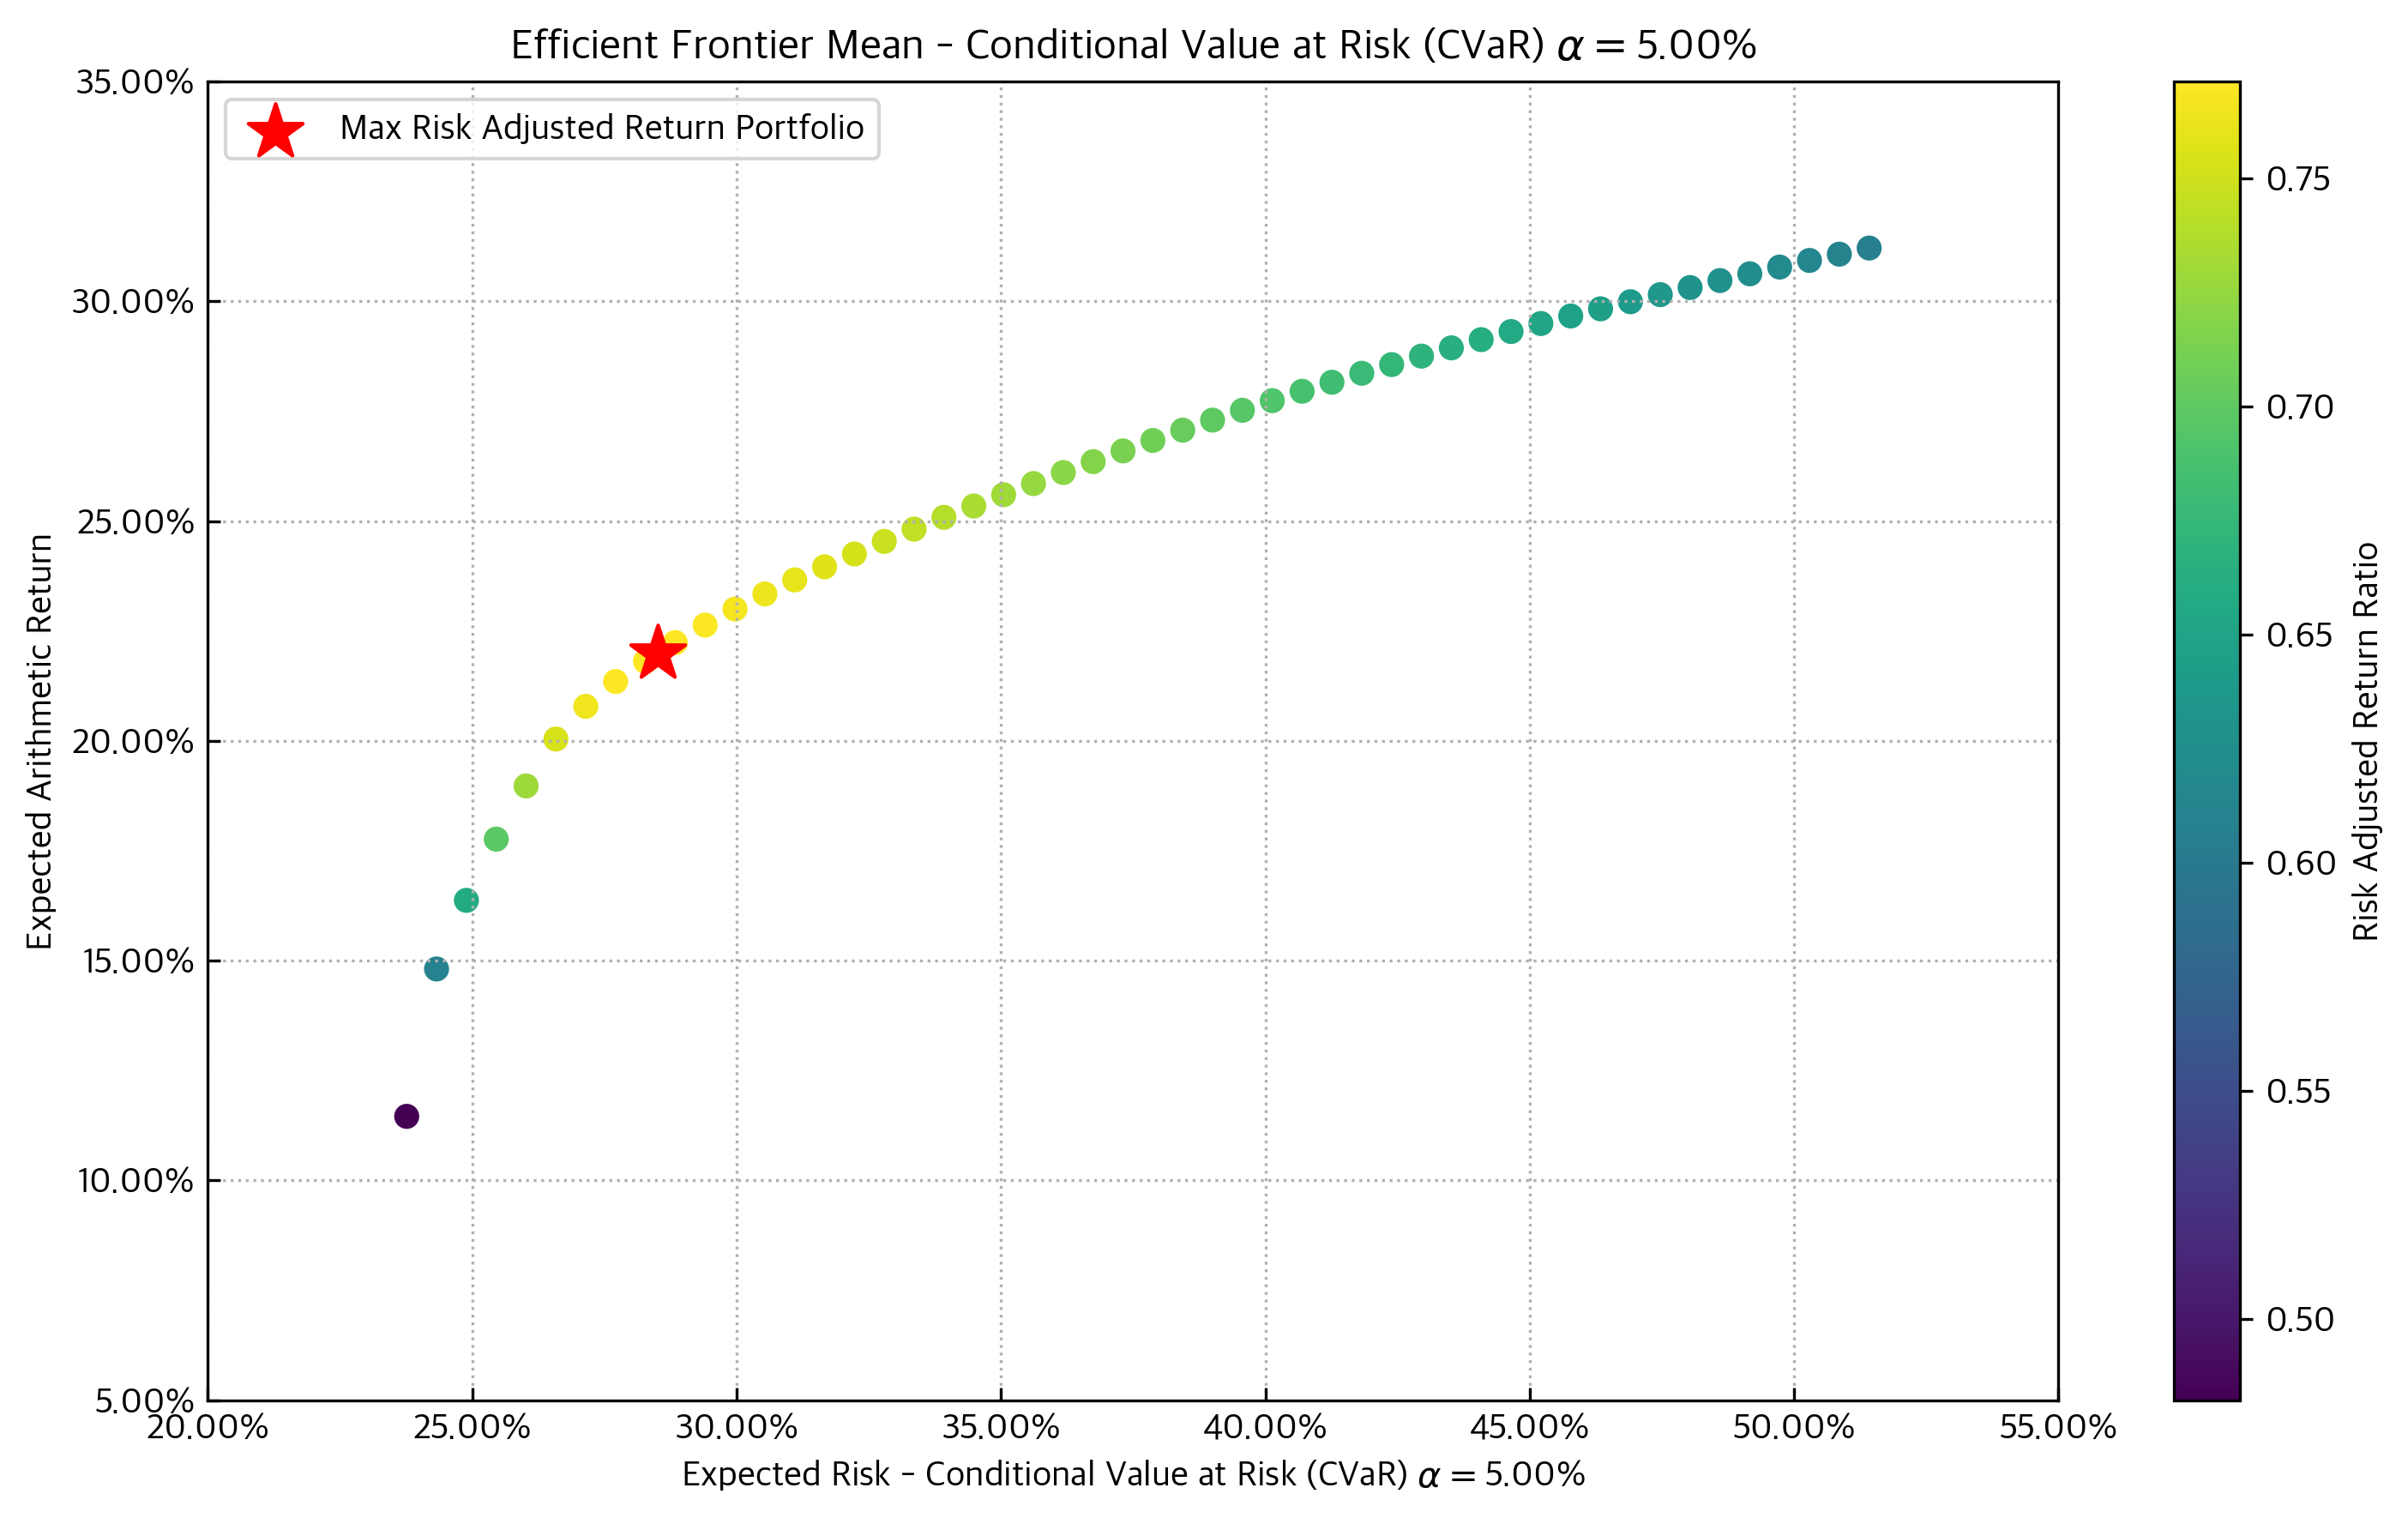

In [10]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

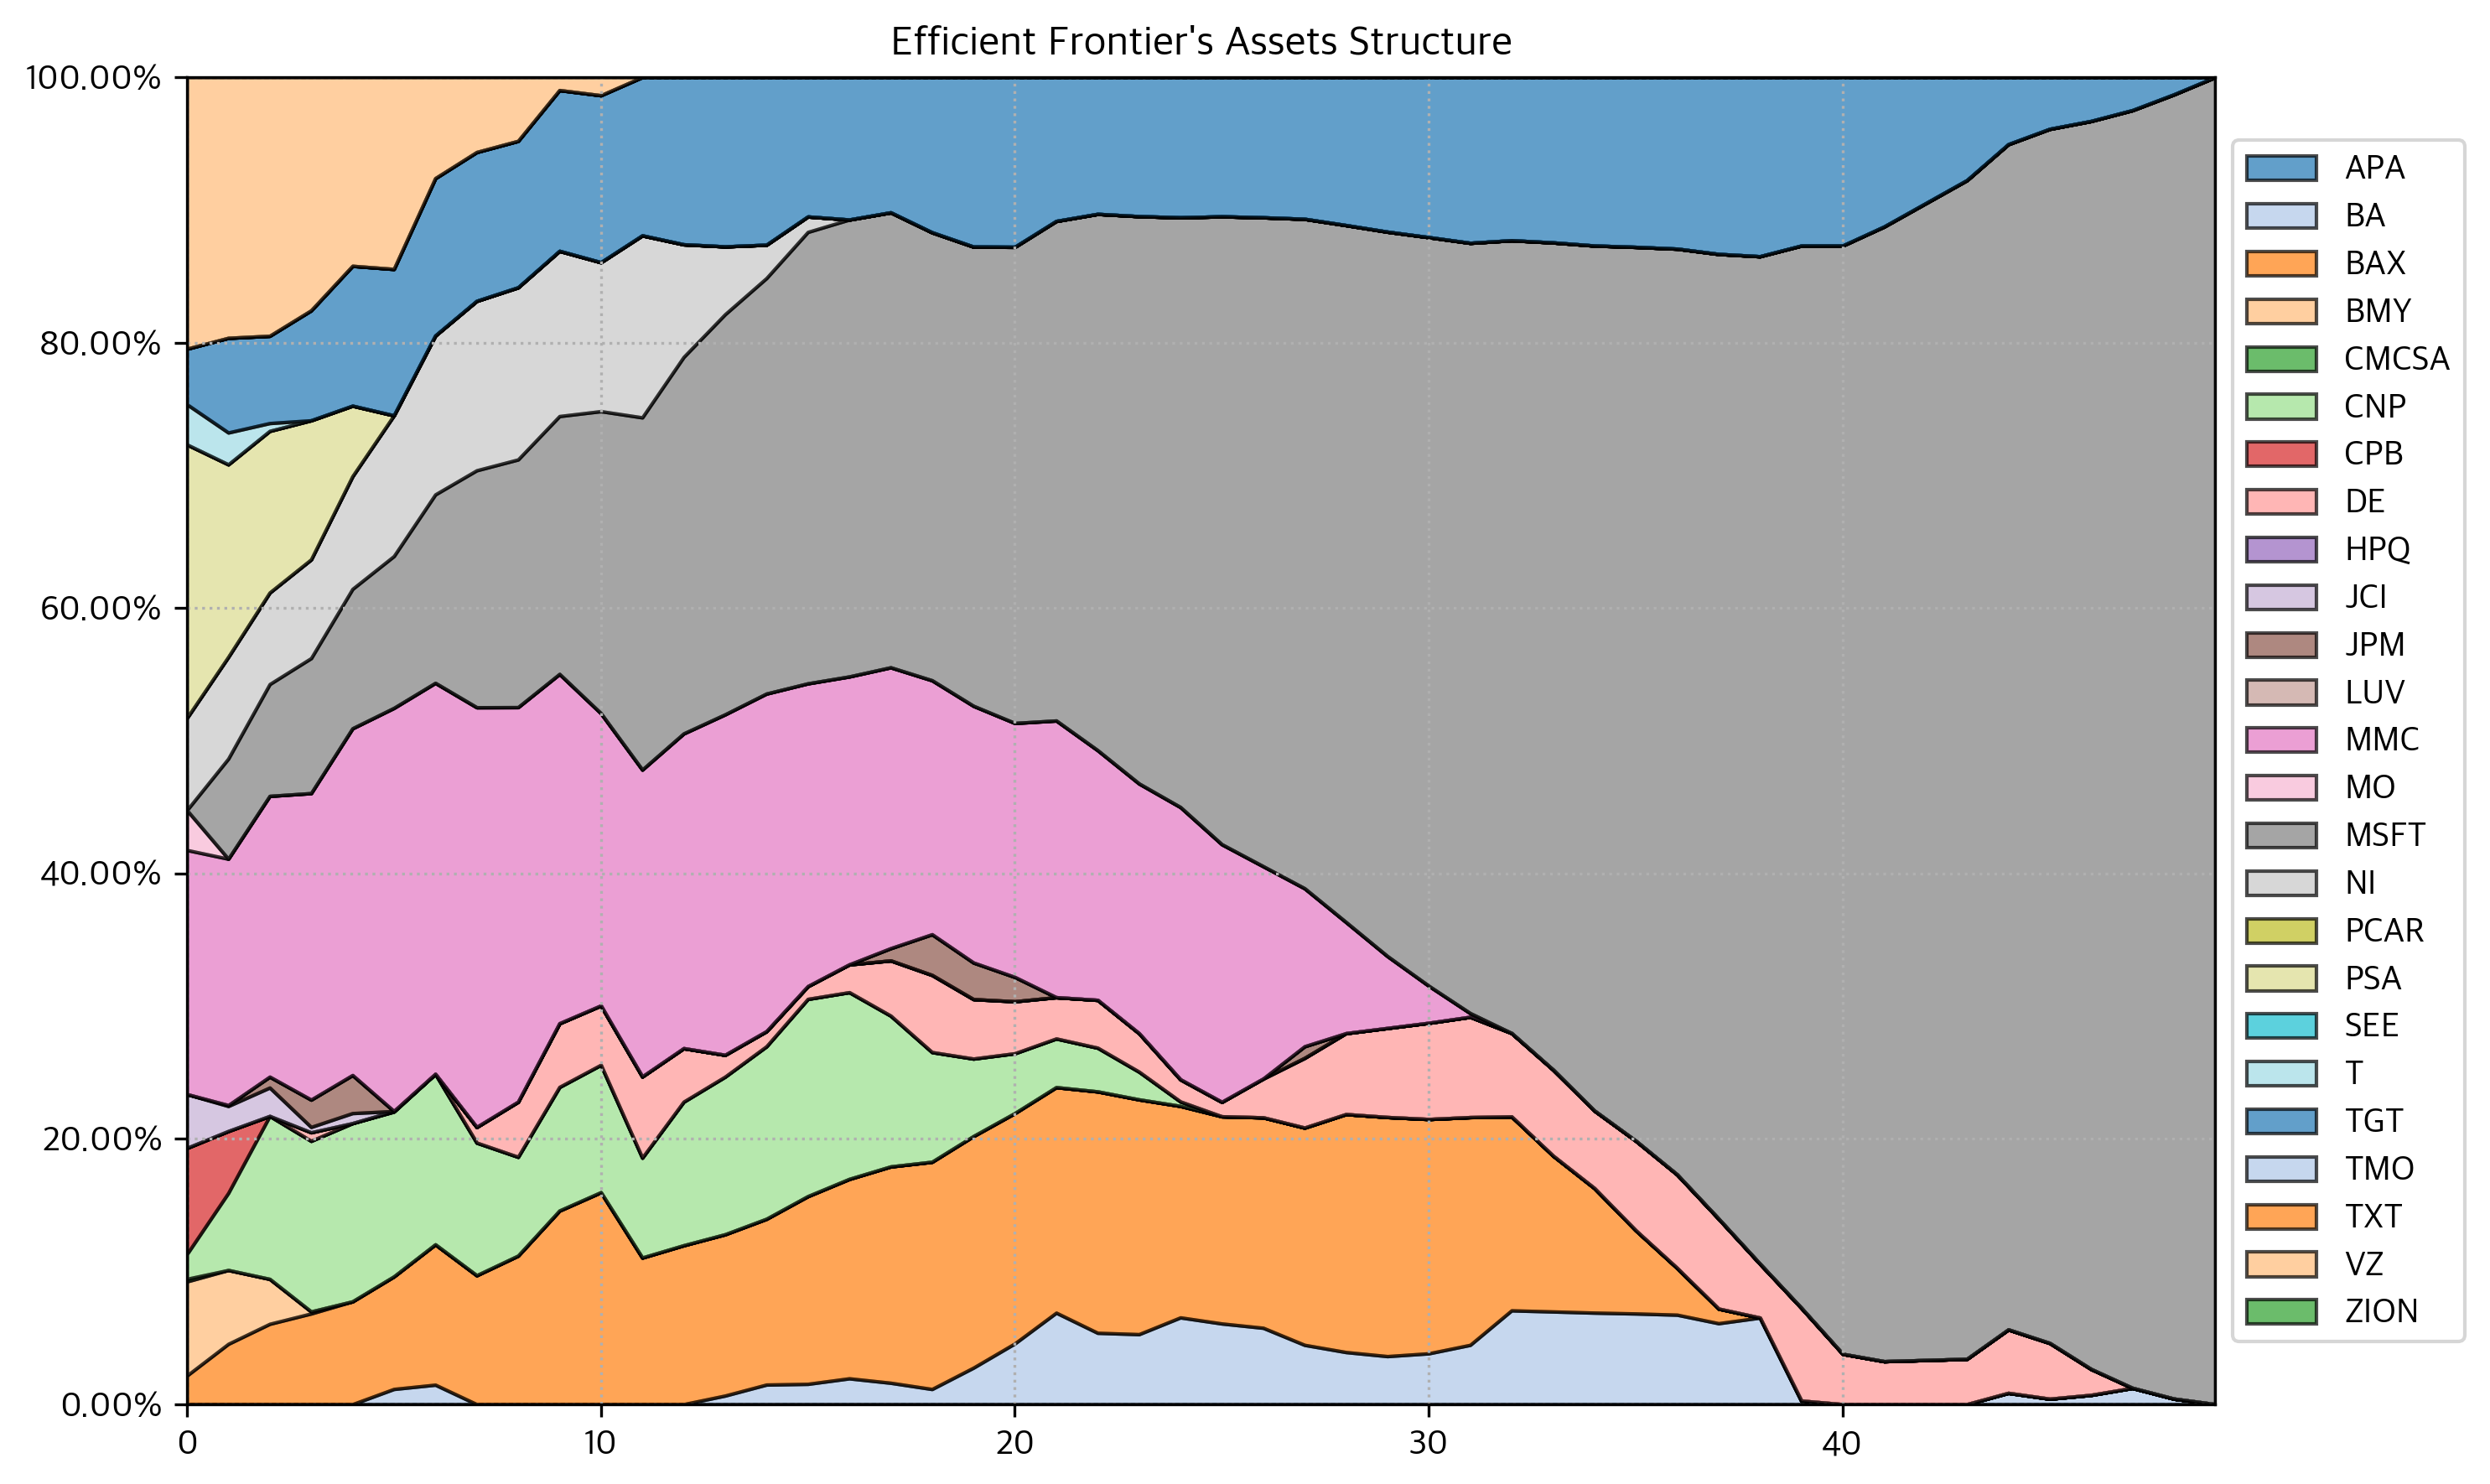

In [11]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

### 3.4 Calculate Optimal Portfolios for Several Risk Measures

#### 리스크 측정 방법 설명

1. **MV (Standard Deviation)**
   - **설명**: 포트폴리오 수익률의 변동성을 측정합니다. 수익률의 평균으로부터 각 수익률이 얼마나 떨어져 있는지를 나타내며, 변동성이 클수록 리스크가 높다고 평가됩니다.
   - **사용 사례**: 일반적인 포트폴리오 최적화에서 가장 널리 사용되는 리스크 측정 방법입니다.

2. **MAD (Mean Absolute Deviation)**
   - **설명**: 수익률의 평균으로부터 절대적인 편차의 평균을 측정합니다. 이는 표준 편차와 유사하지만, 평균에서 벗어난 정도를 절대값으로 계산합니다.
   - **사용 사례**: 변동성을 측정하면서 표준 편차보다 덜 민감하게 반응하는 리스크 측정 방법을 선호하는 경우.

3. **MSV (Semi Standard Deviation)**
   - **설명**: 수익률이 평균 이하일 때의 변동성을 측정합니다. 이는 하방 리스크만을 고려하여, 평균 이상의 수익률은 무시합니다.
   - **사용 사례**: 투자자들이 손실 리스크에 더 민감할 때 사용됩니다.

4. **FLPM (First Lower Partial Moment, Omega Ratio)**
   - **설명**: 특정 기준 수익률 이하의 수익률의 평균 편차를 측정합니다. Omega Ratio는 이 값을 기준 수익률 이상의 수익률과 비교합니다.
   - **사용 사례**: 기준 수익률(목표 수익률)을 설정하고, 그 이하의 손실을 중점적으로 관리하고자 할 때.

5. **SLPM (Second Lower Partial Moment, Sortino Ratio)**
   - **설명**: 기준 수익률 이하의 수익률 변동성을 측정합니다. Sortino Ratio는 이 변동성을 사용하여 포트폴리오의 리스크 조정 수익률을 계산합니다.
   - **사용 사례**: 수익률의 하방 리스크를 고려하여 투자 성과를 평가할 때.

6. **CVaR (Conditional Value at Risk)**
   - **설명**: VaR(Value at Risk)을 초과하는 손실의 기대값을 측정합니다. VaR는 주어진 신뢰 수준에서 발생할 수 있는 최대 손실을 의미합니다.
   - **사용 사례**: 극단적인 손실 리스크를 관리하고자 할 때.

7. **EVaR (Entropic Value at Risk)**
   - **설명**: 확률론적 엔트로피를 기반으로 리스크를 측정합니다. 이는 리스크의 불확실성을 측정하는 방법입니다.
   - **사용 사례**: 불확실성을 포함한 리스크 측정에 중점을 두는 경우.

8. **WR (Worst Realization, Minimax)**
   - **설명**: 가능한 최악의 손실을 측정합니다. Minimax 접근법은 최악의 시나리오를 고려하여 의사 결정을 합니다.
   - **사용 사례**: 최악의 시나리오를 대비하는 보수적인 투자 전략에 사용됩니다.

9. **MDD (Maximum Drawdown)**
   - **설명**: 포트폴리오 가치가 최고점에서 최저점으로 떨어지는 최대 하락폭을 측정합니다.
   - **사용 사례**: 포트폴리오의 최대 손실을 평가할 때 사용됩니다. 특히 Calmar Ratio와 함께 사용되어 위험 대비 수익률을 평가합니다.

10. **ADD (Average Drawdown)**
    - **설명**: 포트폴리오 가치의 평균 하락폭을 측정합니다.
    - **사용 사례**: 포트폴리오의 평균적인 손실 리스크를 평가할 때 사용됩니다.

11. **CDaR (Conditional Drawdown at Risk)**
    - **설명**: VaR와 유사하지만, 최대 낙폭(Maximum Drawdown)을 초과하는 손실의 기대값을 측정합니다.
    - **사용 사례**: 포트폴리오의 극단적인 하락 리스크를 관리할 때 사용됩니다.

12. **EDaR (Entropic Drawdown at Risk)**
    - **설명**: 엔트로피를 사용하여 최대 낙폭의 리스크를 측정합니다.
    - **사용 사례**: 불확실성을 포함한 최대 낙폭 리스크를 평가할 때 사용됩니다.

13. **UCI (Ulcer Index)**
    - **설명**: 포트폴리오 가치가 최고점에서 떨어진 정도와 회복 기간을 종합적으로 측정합니다. 포트폴리오의 심리적 고통을 나타내는 지표로 사용됩니다.
    - **사용 사례**: 장기적인 포트폴리오의 하락 리스크와 회복성을 평가할 때 사용됩니다.


In [31]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [32]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BA,6.16%,7.63%,4.38%,6.11%,3.98%,0.00%,1.60%,0.00%,1.20%,6.79%,2.82%,6.34%,0.00%
BAX,11.50%,9.24%,10.37%,9.04%,10.62%,12.35%,4.77%,0.00%,0.00%,4.48%,0.00%,4.34%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,8.48%,7.21%,9.15%,5.96%,9.38%,7.49%,30.02%,28.96%,56.01%,13.49%,32.93%,18.16%,42.77%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,5.37%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,3.82%,2.73%,1.18%,2.33%,0.90%,5.14%,0.00%,0.00%,13.08%,1.49%,0.82%,1.01%,2.98%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

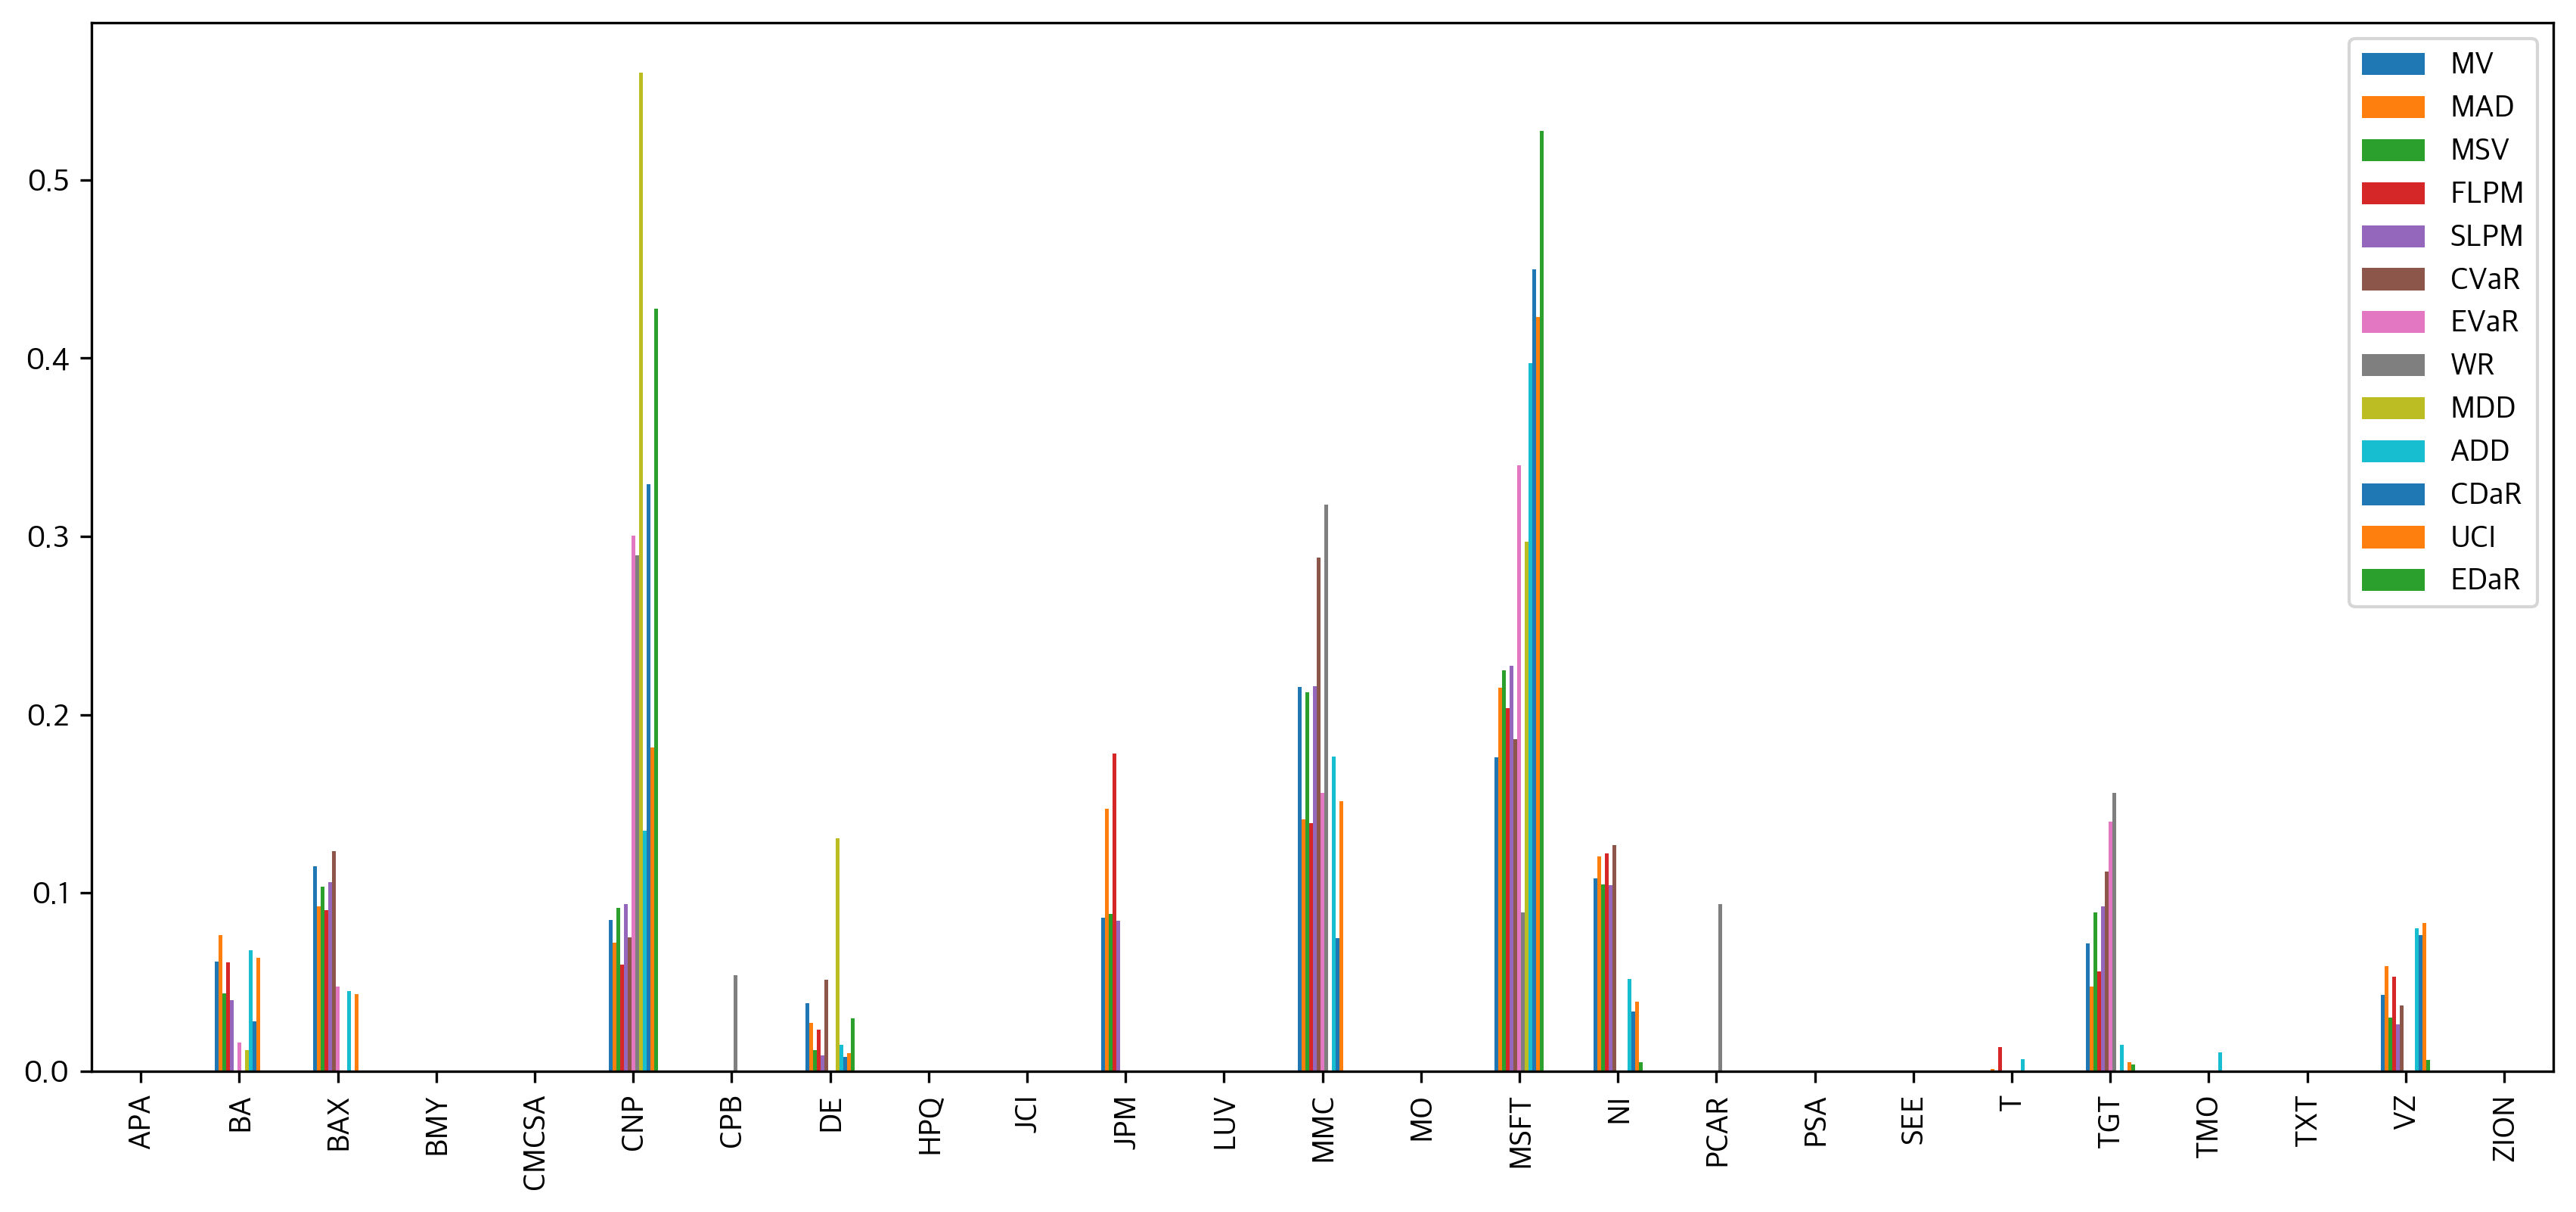

In [33]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

## 4. Constraints on Assets and Assets Classes

### 4.1 Creating the constraints

In [34]:
asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
                            'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
                            'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T','BA'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health Care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, False, False, False, False],
               'Type': ['All Assets', 'Classes', 'Classes', 'Classes',
                        'Classes'],
               'Set': ['', 'Industry', 'Industry', 'Industry', 'Industry'],
               'Position': ['', 'Financials', 'Utilities', 'Industrials',
                            'Consumer Discretionary'],
               'Sign': ['<=', '<=', '<=', '<=', '<='],
               'Weight': [0.10, 0.2, 0.2, 0.2, 0.2],
               'Type Relative': ['', '', '', '', ''],
               'Relative Set': ['', '', '', '', ''],
               'Relative': ['', '', '', '', ''],
               'Factor': ['', '', '', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,<=,10.0000%,,,,
1,False,Classes,Industry,Financials,<=,20.0000%,,,,
2,False,Classes,Industry,Utilities,<=,20.0000%,,,,
3,False,Classes,Industry,Industrials,<=,20.0000%,,,,
4,False,Classes,Industry,Consumer Discretionary,<=,20.0000%,,,,


In [35]:
A, B = rp.assets_constraints(constraints, asset_classes)

### 4.2 Optimize the portfolio with the constraints

In [36]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,3.7276%,10.0000%,0.0000%,1.7590%,10.0000%,0.0000%,9.0766%,0.0000%,0.0000%,...,10.0000%,0.0000%,0.0000%,0.0000%,0.0012%,9.4403%,9.7230%,0.0000%,10.0000%,0.0000%


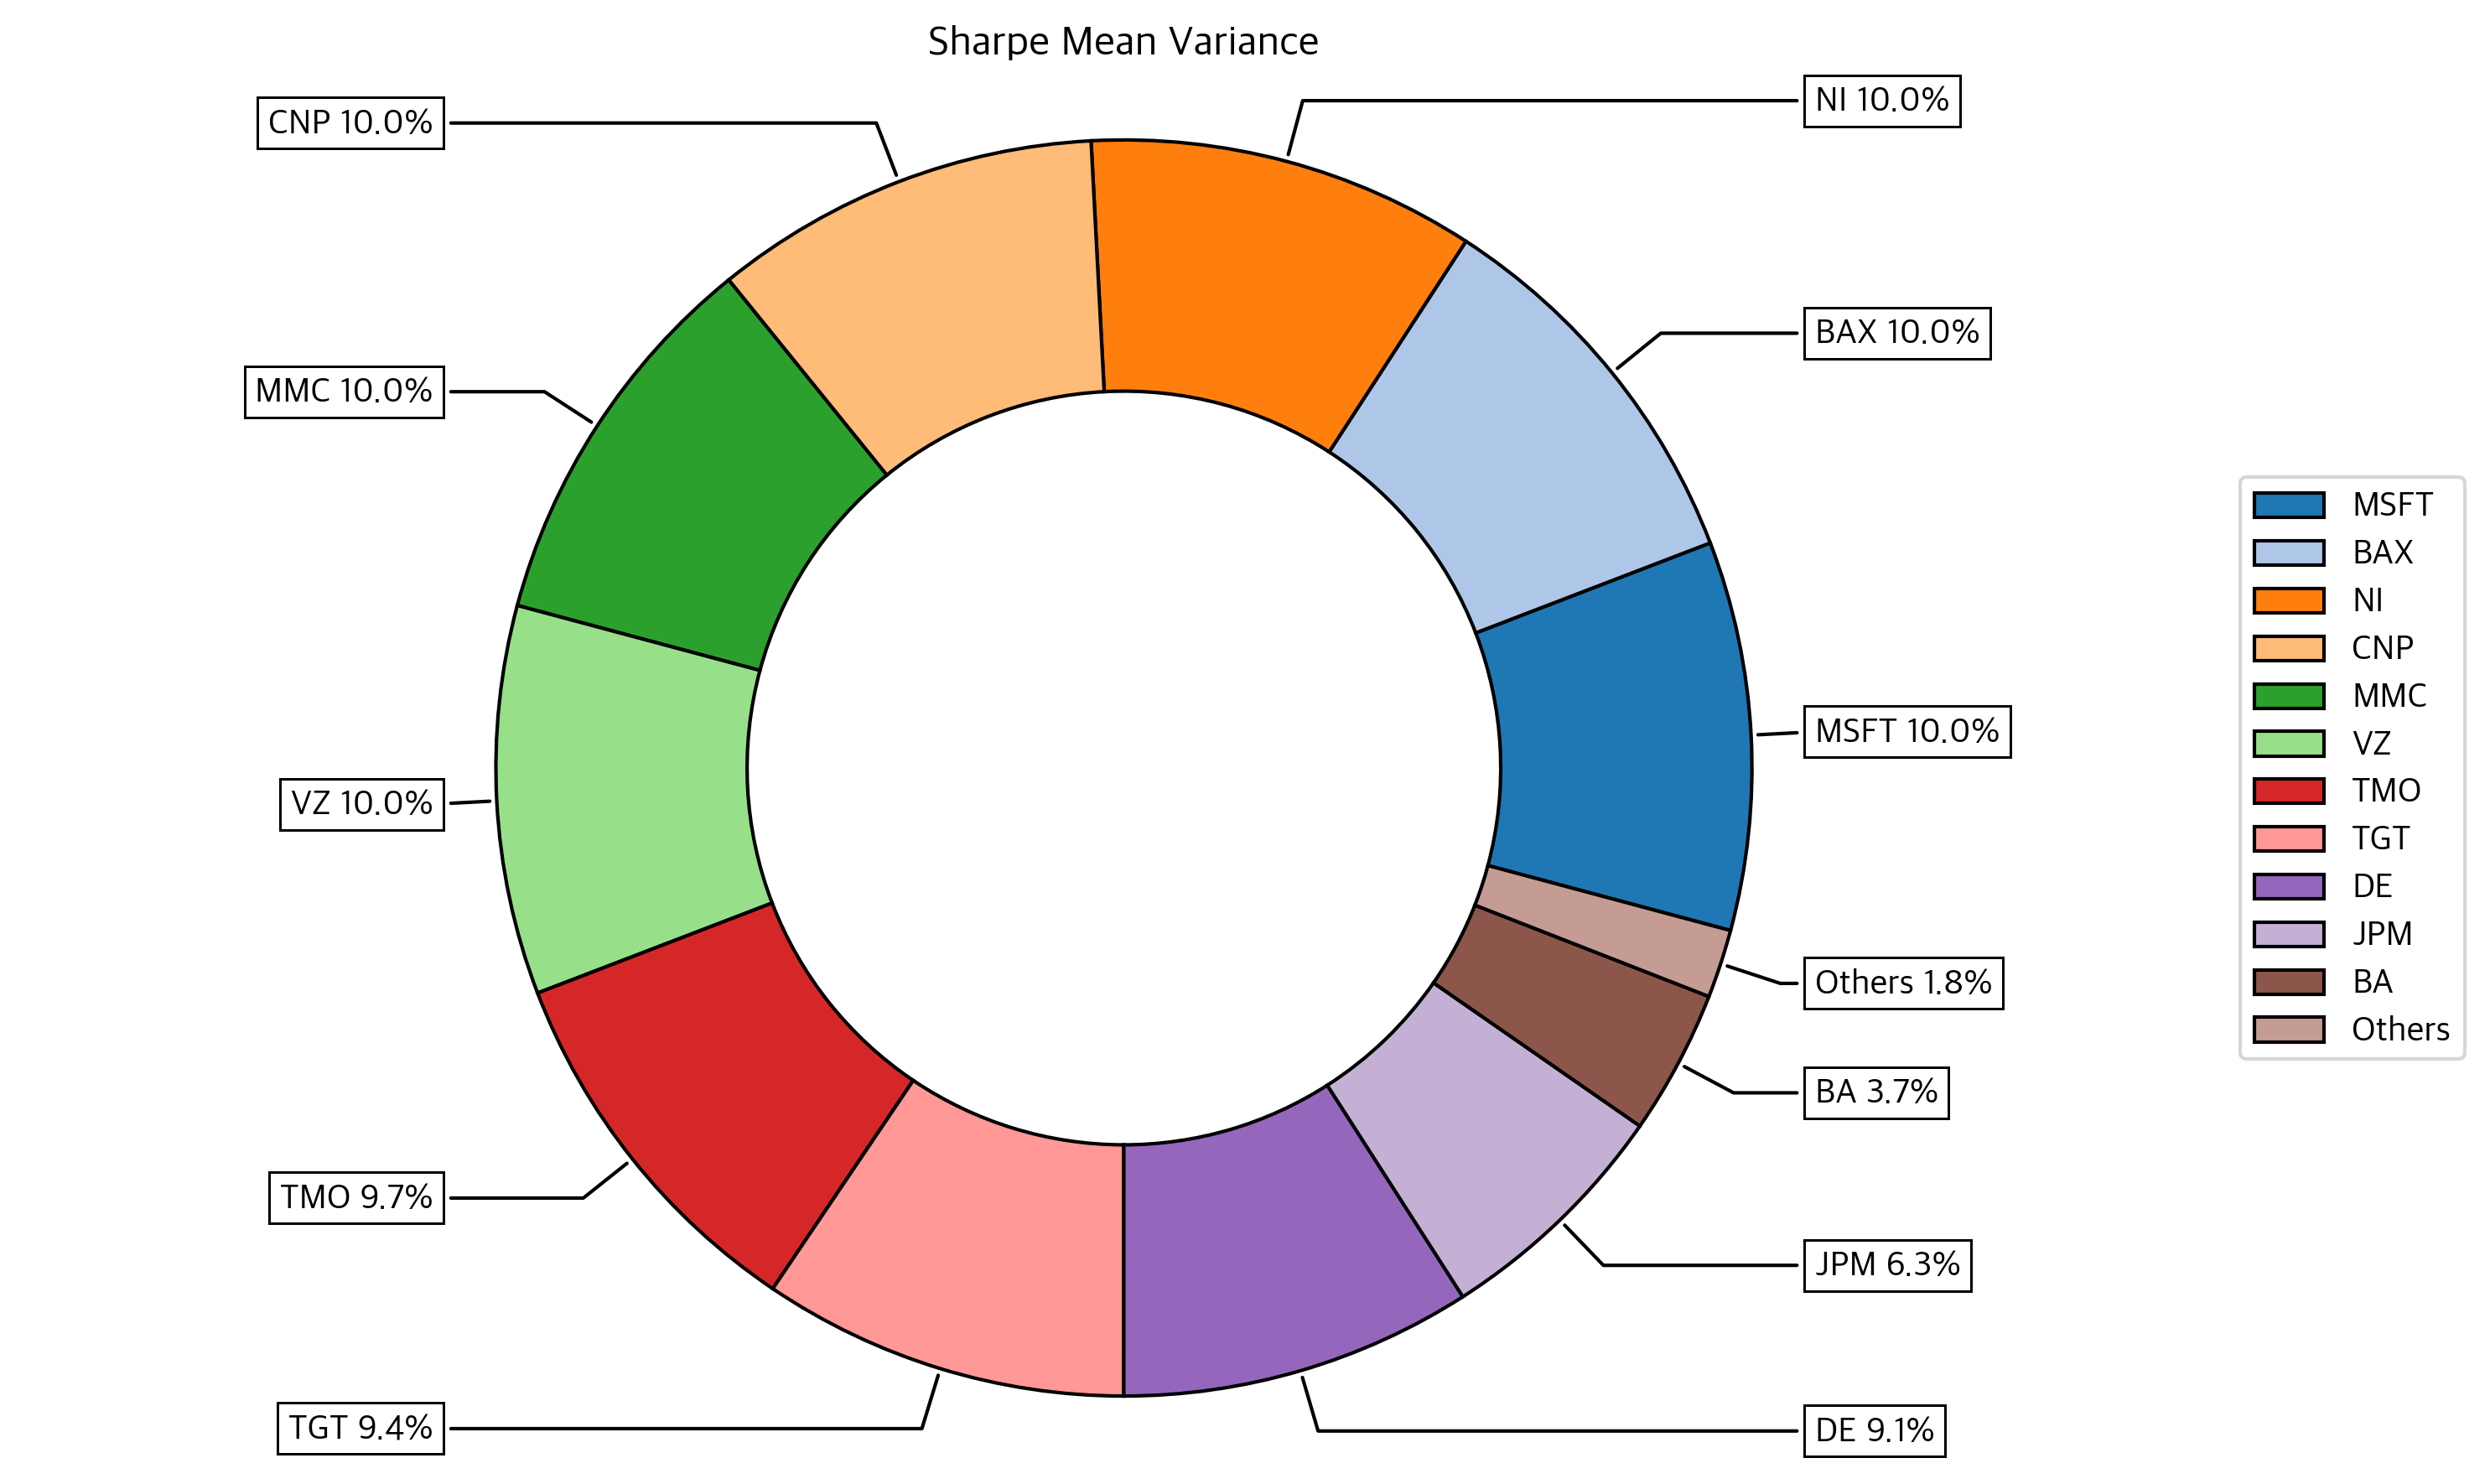

In [37]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [38]:
w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)

display(w_classes)

,Industry,weights
APA,Energy,0.0000%
BA,Financials,3.7276%
BAX,Health Care,10.0000%
BMY,Health Care,0.0000%
CMCSA,Consumer Discretionary,1.7590%
CNP,Utilities,10.0000%
CPB,Consumer Staples,0.0000%
DE,Industrials,9.0766%
HPQ,Information Technology,0.0000%
JCI,Consumer Discretionary,0.0000%


In [39]:
w_classes = w_classes.groupby(['Industry']).sum()

display(w_classes)

,weights
Industry,
Consumer Discretionary,11.1993%
Consumer Staples,0.0000%
Energy,0.0000%
Financials,20.0000%
Health Care,19.7230%
Industrials,9.0766%
Information Technology,10.0000%
Materials,0.0000%
Telecommunications Services,10.0012%


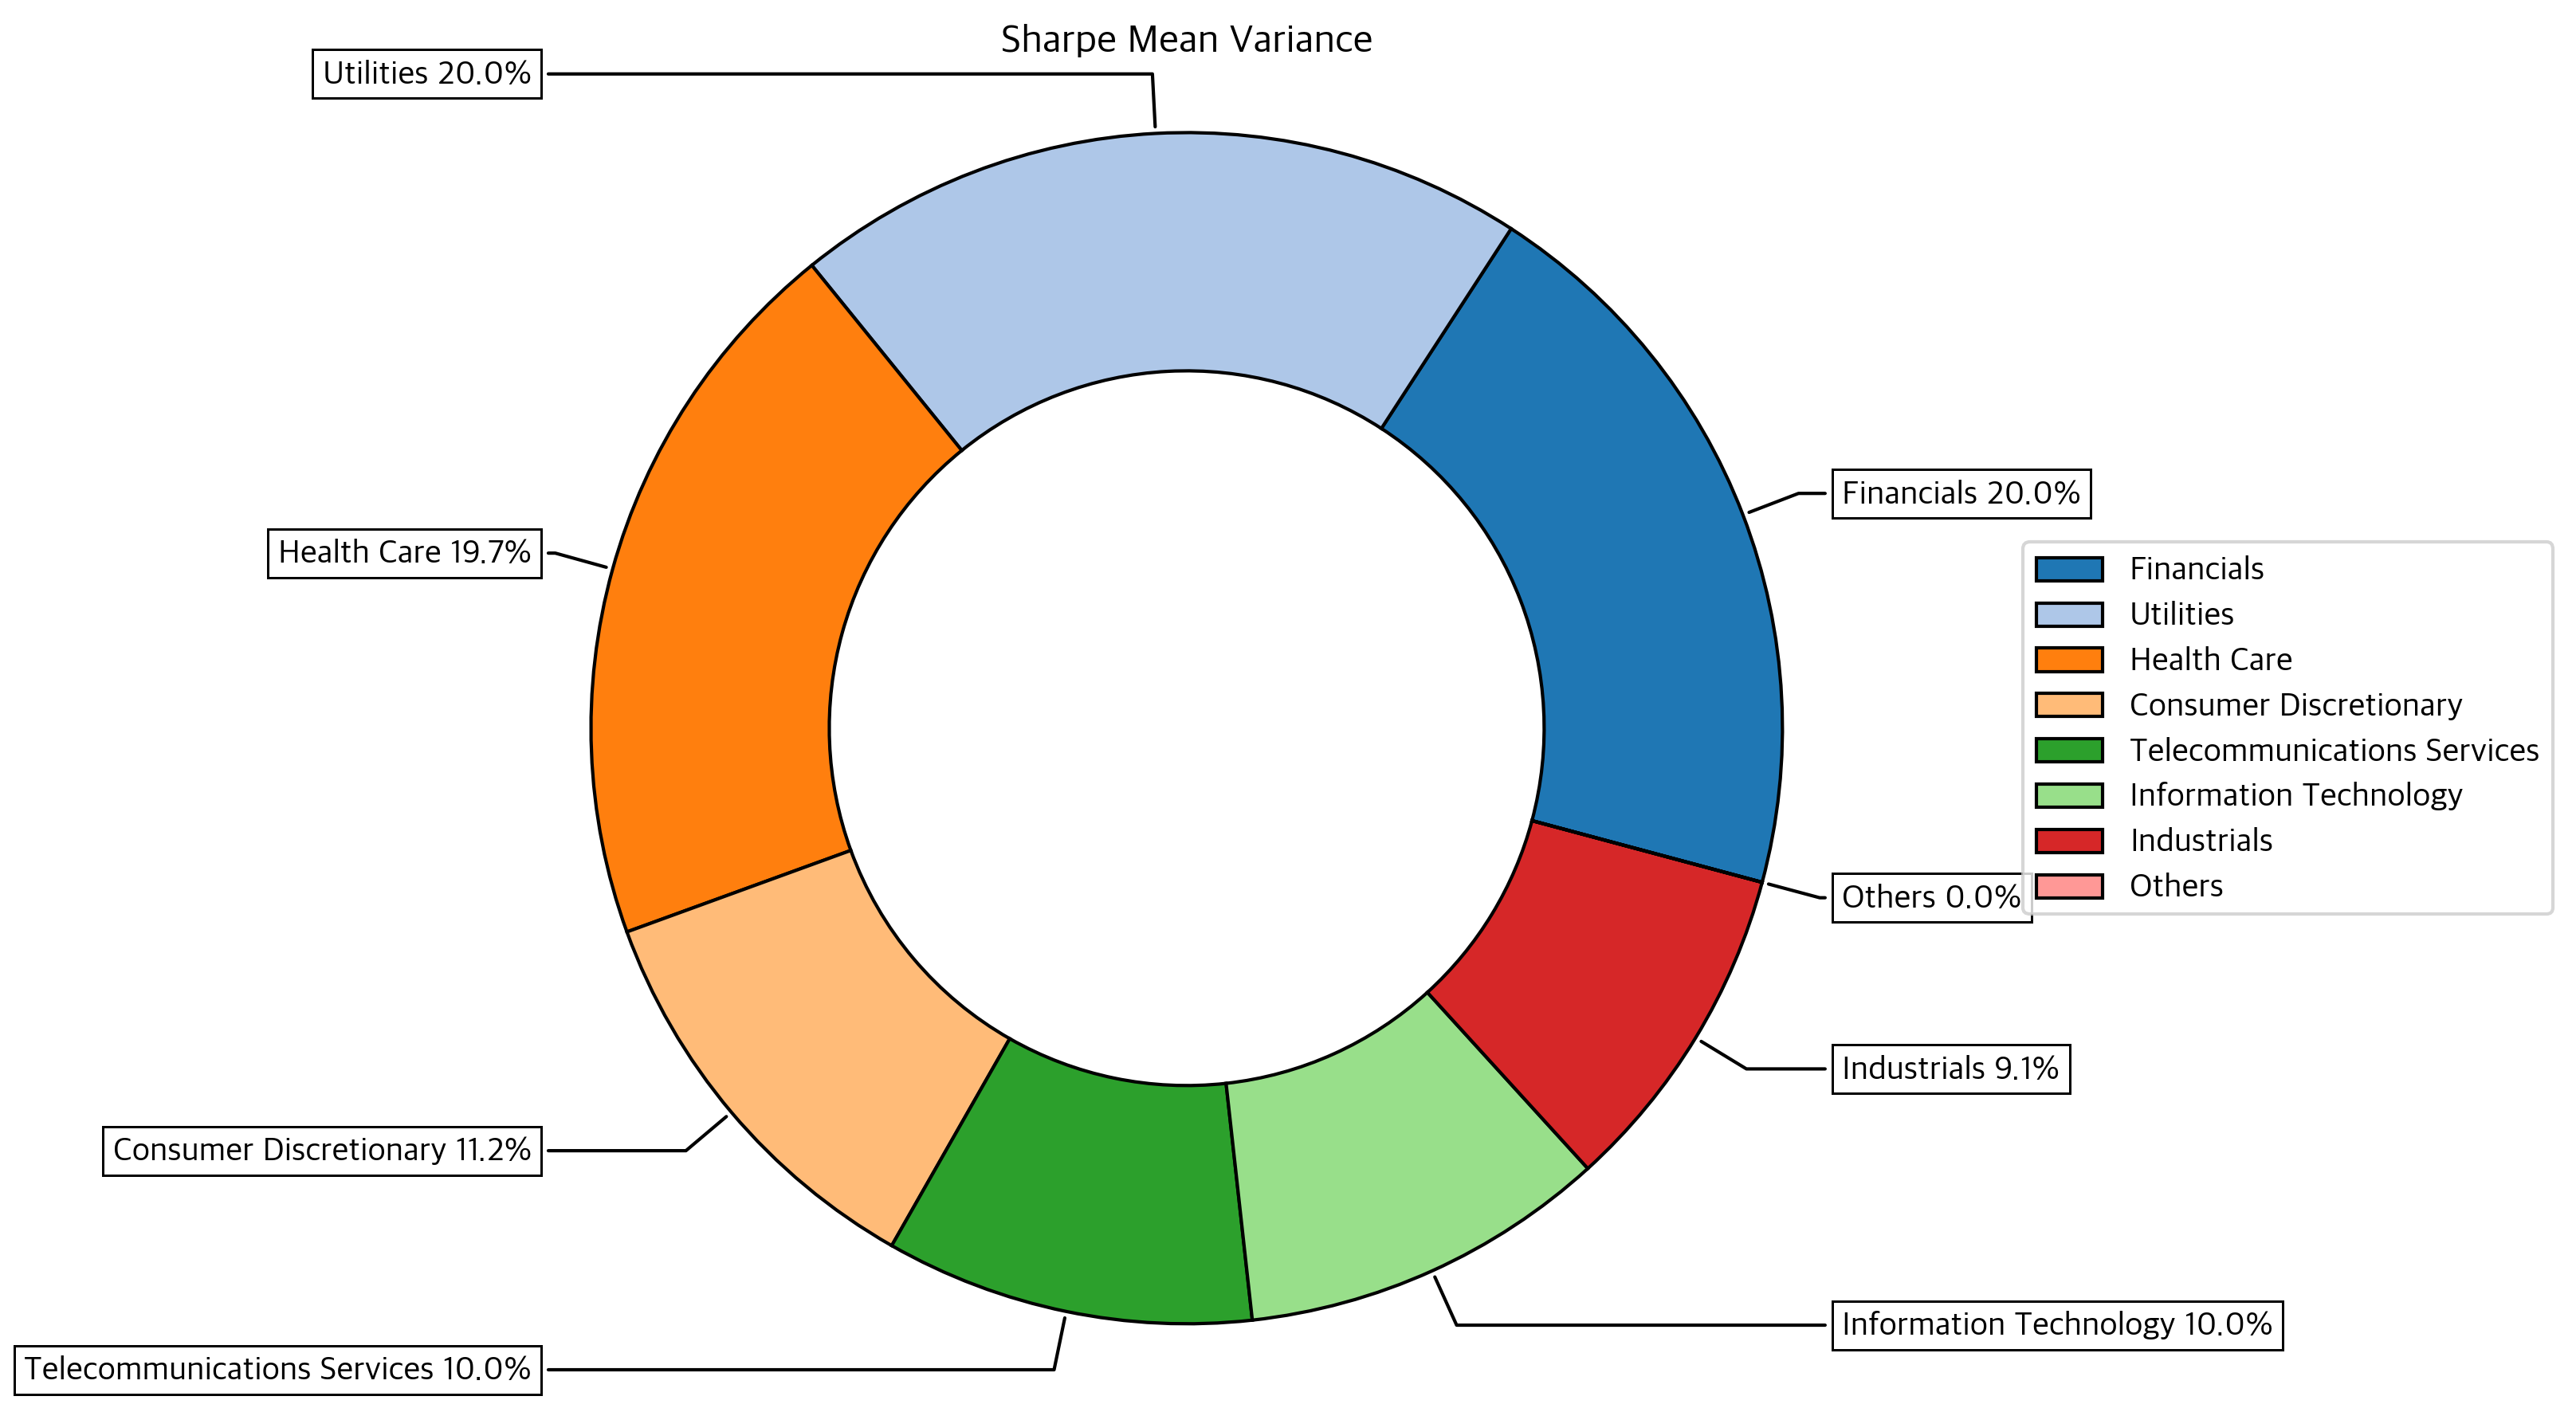

In [40]:
ax = rp.plot_pie(w=w_classes, title='Sharpe Mean Variance', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)